## 1. Loading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime

sns.set()

#### training set

In [2]:
train = pd.read_csv('/Users/andy/Desktop/Case/data/ml_case_training_data.csv')
label = pd.read_csv('/Users/andy/Desktop/Case/data/ml_case_training_output.csv')
hist = pd.read_csv('/Users/andy/Desktop/Case/data/ml_case_training_hist_data.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [4]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [5]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


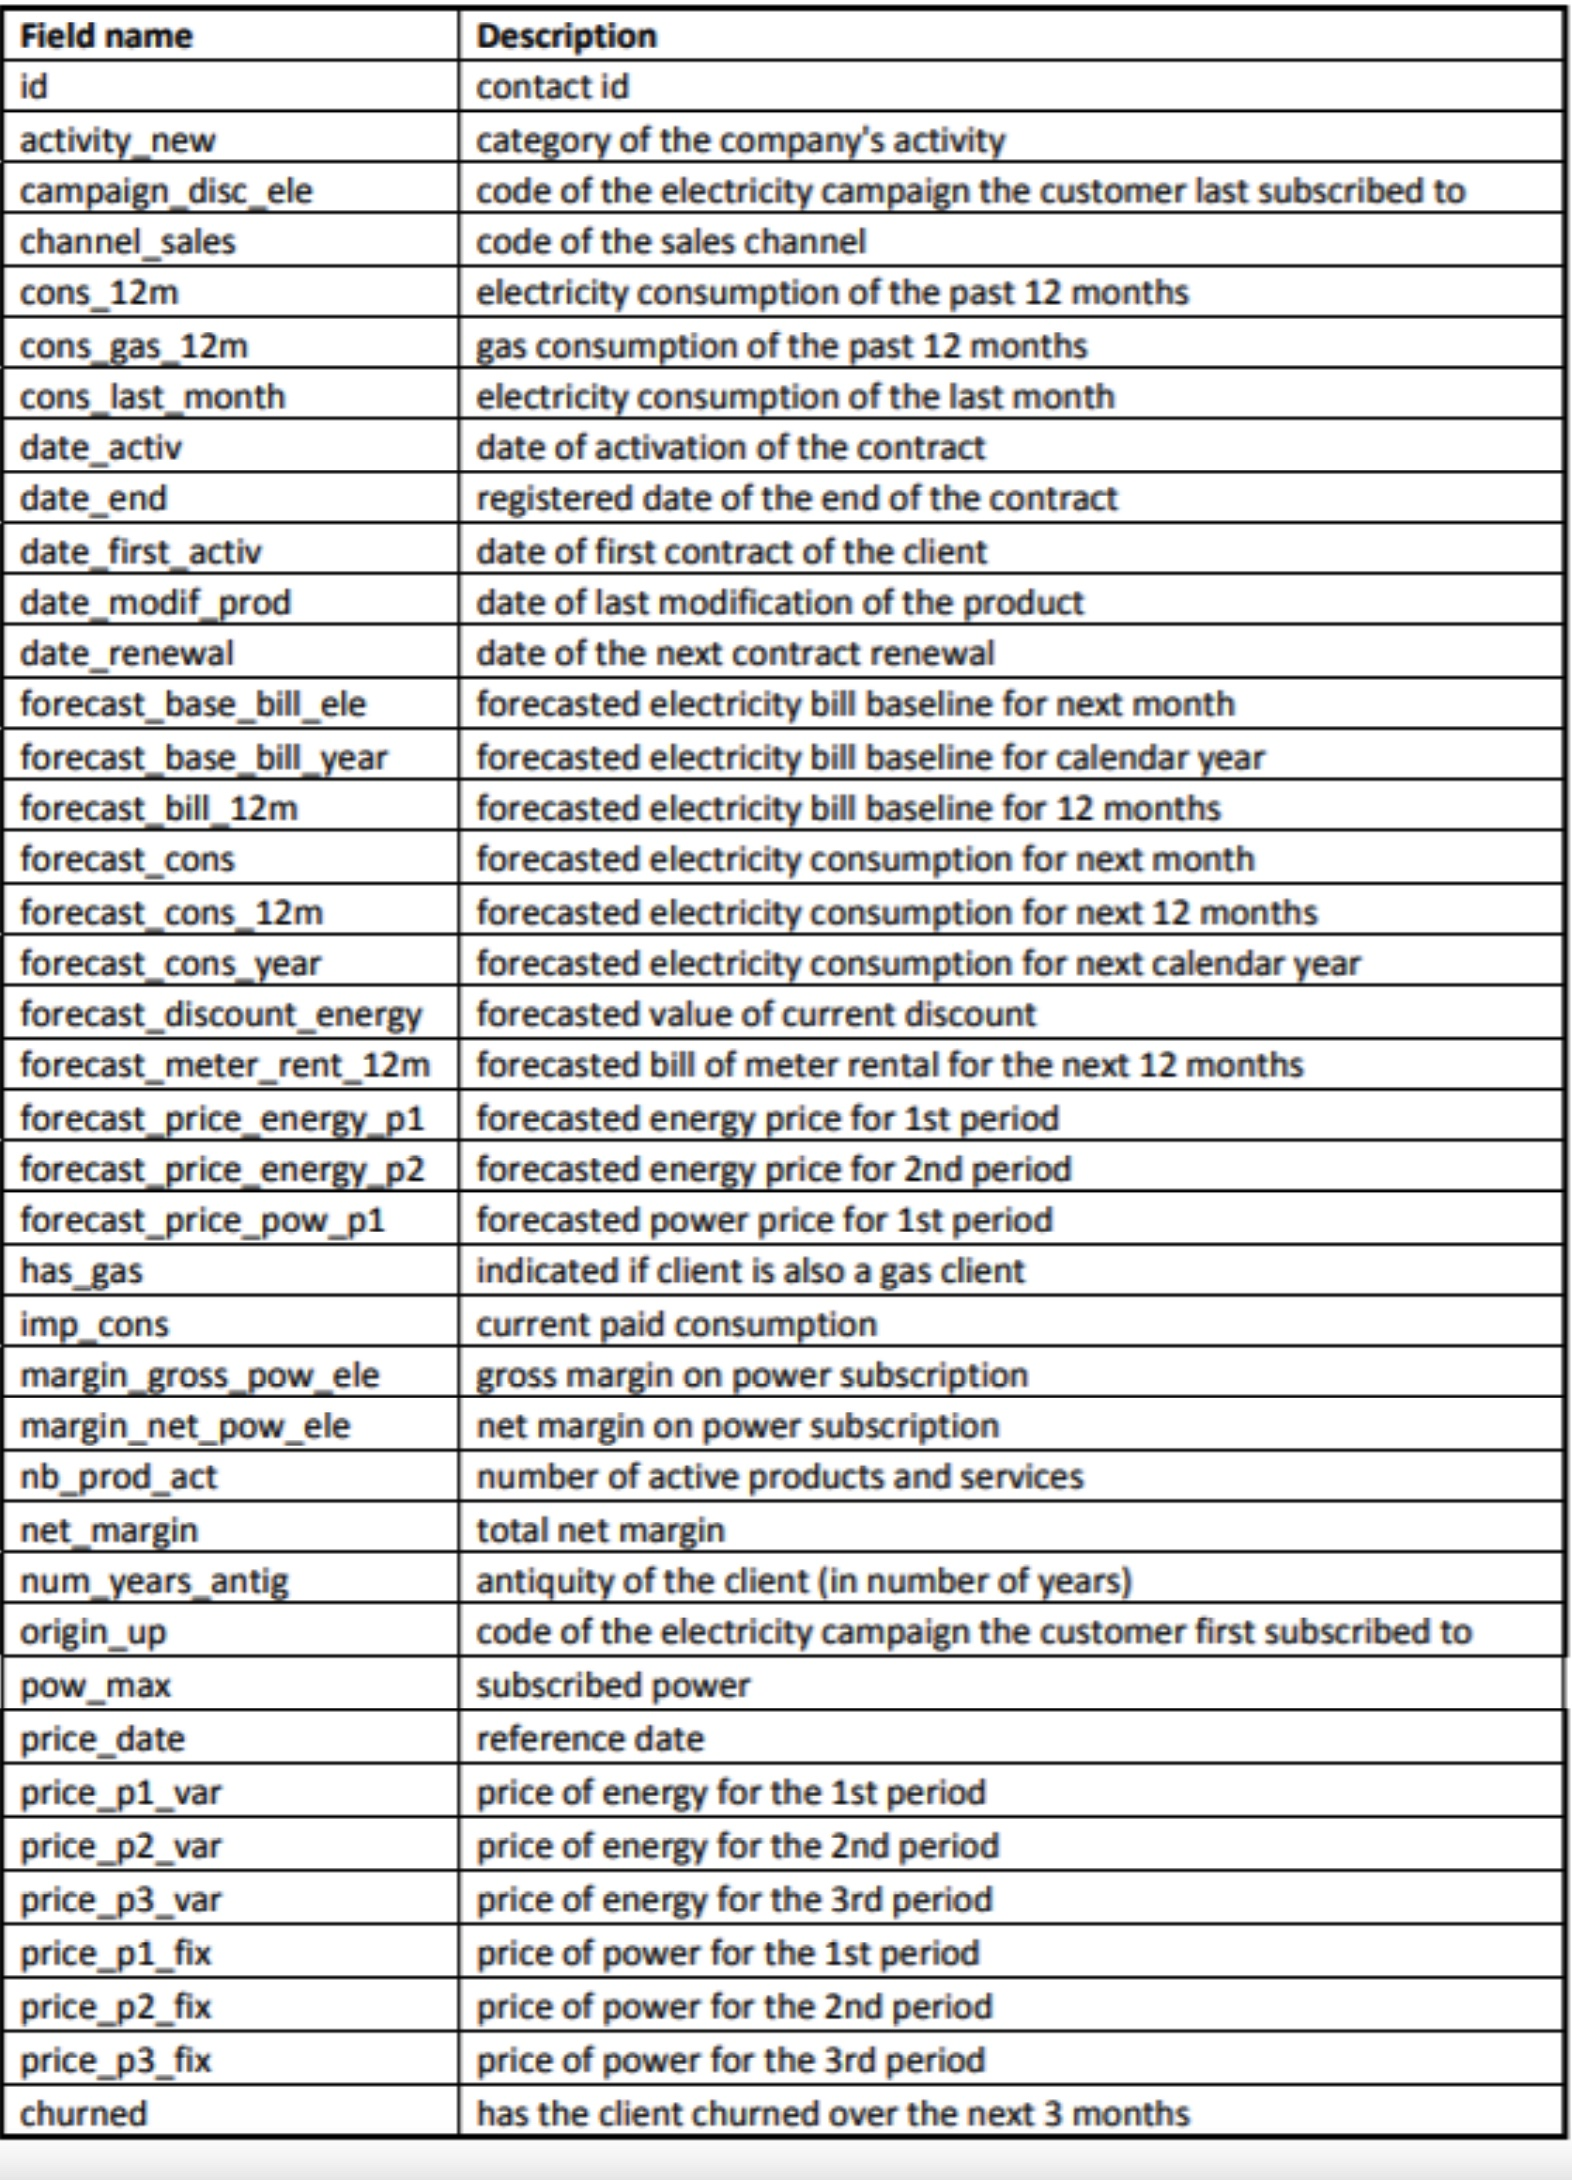

In [6]:
# Data Dictionary
from IPython.display import Image
Image(filename='Data Dictionary.jpg')

#### test set

In [7]:
test = pd.read_csv('/Users/andy/Desktop/Case/data/ml_case_test_data.csv')
test_hist = pd.read_csv('/Users/andy/Desktop/Case/data/ml_case_test_hist_data.csv')
output = pd.read_csv('/Users/andy/Desktop/Case/data/ml_case_test_output_template.csv')

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4024 non-null   object 
 1   activity_new              1670 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             2968 non-null   object 
 4   cons_12m                  4024 non-null   int64  
 5   cons_gas_12m              4024 non-null   int64  
 6   cons_last_month           4024 non-null   int64  
 7   date_activ                4024 non-null   object 
 8   date_end                  4024 non-null   object 
 9   date_first_activ          877 non-null    object 
 10  date_modif_prod           3979 non-null   object 
 11  date_renewal              4020 non-null   object 
 12  forecast_base_bill_ele    877 non-null    float64
 13  forecast_base_bill_year   877 non-null    float64
 14  forecast

In [9]:
test.activity_new.value_counts()

apdekpcbwosbxepsfxclislboipuxpop    397
kkklcdamwfafdcfwofuscwfwadblfmce    105
kwuslieomapmswolewpobpplkaooaaew     51
ckfxocssowaeipxueikxcmaxdmcduxsa     49
fmwdwsxillemwbbwelxsampiuwwpcdcb     45
                                   ... 
ikofkbbsefbpasiomapclxkddisloube      1
xkfpfmcwobuumawmkxleudppfwiwwbmb      1
lplipswbpdloacuapedmspmesfkbeocu      1
mbdpueaepmxiidaadsixoemwxwxexkwd      1
uabmamaupwuebiddlpceixxceswcmkfa      1
Name: activity_new, Length: 281, dtype: int64

In [10]:
train.activity_new.value_counts()

apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
ckfxocssowaeipxueikxcmaxdmcduxsa     189
                                    ... 
laxkdmpaielkeuduscppxlwpmaedlaww       1
bcsfemospxbiwoudpemmseeckfcpwfwu       1
xmwbumaacodddfxueeocfiucawccblxe       1
ksukukiwxdxwbfwaapmuwippflemumlp       1
aacewucldmklslcffeckexipaemmsdfk       1
Name: activity_new, Length: 419, dtype: int64

In [11]:
test.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    1791
lmkebamcaaclubfxadlmueccxoimlema     528
usilxuppasemubllopkaafesmlibmsdf     392
ewpakwlliwisiwduibdlfmalxowmwpci     252
fixdbufsefwooaasfcxdxadsiekoceaa       2
epumfxlbckeskwekxbiuasklxalciiuu       2
sddiedcslfslkckwlfkdpoeeailfpeds       1
Name: channel_sales, dtype: int64

In [12]:
train.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7377
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [13]:
test.origin_up.value_counts()

lxidpiddsbxsbosboudacockeimpuepw    1900
kamkkxfxxuwbdslkwifmmcsiusiuosws    1164
ldkssxwpmemidmecebumciepifcamkci     931
aabpopmuoobccoxasfsksebxoxffdcxs       2
Name: origin_up, dtype: int64

In [14]:
train.origin_up.value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7825
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3664
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

#### Notes:
There are different values in the 'origin_up' col of the Training set and the Test set. It will cause a tricky problem in feature engineering

In [15]:
# The 'campaign_disc_ele' col of both training set and test set are empty, delete it
train.drop(['campaign_disc_ele'], inplace=True, axis=1)
test.drop(['campaign_disc_ele'], inplace=True, axis=1)

In [16]:
train = train.merge(label, how='left', on=['id'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   channel_sales             11878 non-null  object 
 3   cons_12m                  16096 non-null  int64  
 4   cons_gas_12m              16096 non-null  int64  
 5   cons_last_month           16096 non-null  int64  
 6   date_activ                16096 non-null  object 
 7   date_end                  16094 non-null  object 
 8   date_first_activ          3508 non-null   object 
 9   date_modif_prod           15939 non-null  object 
 10  date_renewal              16056 non-null  object 
 11  forecast_base_bill_ele    3508 non-null   float64
 12  forecast_base_bill_year   3508 non-null   float64
 13  forecast_bill_12m         3508 non-null   float64
 14  foreca

## 2. Data Cleaning

### *2.1 Duplicates*

In [17]:
# Check whether there are duplicates, training set
print(train.duplicated().sum())
print(hist.duplicated().sum())

0
0


In [18]:
# test set
print(test.duplicated().sum())
print(test_hist.duplicated().sum())

0
0


### *2.2 Outliers*

#### training set

In [19]:
# Select numerical values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_train = train.select_dtypes(include=numerics)
new_train.drop(['churn'], inplace=True, axis=1)
new_train.head()

/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
0,309275,0,10025,NaN,NaN,NaN,NaN,26520.30,10025,0.0,...,0.095919,0.088347,58.995952,831.8,-41.76,-41.76,1,1732.36,3,180.000
1,0,54946,0,NaN,NaN,NaN,NaN,0.00,0,0.0,...,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648
2,4660,0,0,NaN,NaN,NaN,NaN,189.95,0,0.0,...,0.145711,0.000000,44.311378,0.0,16.38,16.38,1,18.89,6,13.800
3,544,0,0,NaN,NaN,NaN,NaN,47.96,0,0.0,...,0.165794,0.087899,44.311378,0.0,28.60,28.60,1,6.60,6,13.856
4,1584,0,0,NaN,NaN,NaN,NaN,240.04,0,0.0,...,0.146694,0.000000,44.311378,0.0,30.22,30.22,1,25.46,6,13.200


In [20]:
# Statistical summary
new_train.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
cons_12m,16096.0,194804.384630,679515.083441,-125276.000000,3.000000,2598.500000,5906.250000,15332.500000,50221.500000,325561.500000,1.018840e+06,3.957727e+06,1.609711e+07
cons_gas_12m,16096.0,31911.636742,177588.456233,-3037.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17393.500000,1.031378e+05,9.315016e+05,4.188440e+06
cons_last_month,16096.0,19461.536158,82356.756560,-91386.000000,0.000000,0.000000,0.000000,901.000000,4127.000000,29603.000000,1.021838e+05,4.692100e+05,4.538720e+06
forecast_base_bill_ele,3508.0,335.843857,649.406000,-364.940000,0.000000,0.000000,0.000000,162.955000,396.185000,839.876000,1.330089e+03,2.988201e+03,1.256608e+04
forecast_base_bill_year,3508.0,335.843857,649.406000,-364.940000,0.000000,0.000000,0.000000,162.955000,396.185000,839.876000,1.330089e+03,2.988201e+03,1.256608e+04
forecast_bill_12m,3508.0,3837.441866,5425.744327,-2503.480000,0.000000,773.531000,1158.175000,2187.230000,4246.555000,8124.705000,1.301319e+04,2.669321e+04,8.112263e+04
forecast_cons,3508.0,206.845165,455.634288,0.000000,0.000000,0.000000,0.000000,42.215000,228.117500,577.907000,9.163045e+02,2.136867e+03,9.682890e+03
forecast_cons_12m,16096.0,2370.555949,4035.085664,-16689.260000,0.000000,235.645000,513.230000,1179.160000,2692.077500,5396.370000,8.038102e+03,1.853463e+04,1.038019e+05
forecast_cons_year,16096.0,1907.347229,5257.364759,-85627.000000,0.000000,0.000000,0.000000,378.000000,1994.250000,4942.500000,7.854750e+03,1.999005e+04,1.753750e+05
forecast_discount_energy,15970.0,0.991547,5.160969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.000000e+01,5.000000e+01


In [21]:
# There's no reason that consumpations and bill would be negative, replace negative values with 0
consumpations = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_meter_rent_12m', 'forecast_price_pow_p1', 'imp_cons']

for col in consumpations:
    new_train[col] = new_train[col].clip(lower=0) # set lower limit as 0

/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
# Statistical summary
new_train.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
cons_12m,16096.0,194833.895875,679504.497509,0.00,3.000000,2598.500000,5906.250000,15332.500000,50221.500000,325561.500000,1.018840e+06,3.957727e+06,1.609711e+07
cons_gas_12m,16096.0,31912.270378,177588.338403,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,17393.500000,1.031378e+05,9.315016e+05,4.188440e+06
cons_last_month,16096.0,19531.721111,82316.063727,0.00,0.000000,0.000000,0.000000,901.000000,4127.000000,29603.000000,1.021838e+05,4.692100e+05,4.538720e+06
forecast_base_bill_ele,3508.0,335.947888,649.322932,0.00,0.000000,0.000000,0.000000,162.955000,396.185000,839.876000,1.330089e+03,2.988201e+03,1.256608e+04
forecast_base_bill_year,3508.0,335.947888,649.322932,0.00,0.000000,0.000000,0.000000,162.955000,396.185000,839.876000,1.330089e+03,2.988201e+03,1.256608e+04
forecast_bill_12m,3508.0,3838.826430,5424.454220,0.00,0.000000,773.531000,1158.175000,2187.230000,4246.555000,8124.705000,1.301319e+04,2.669321e+04,8.112263e+04
forecast_cons,3508.0,206.845165,455.634288,0.00,0.000000,0.000000,0.000000,42.215000,228.117500,577.907000,9.163045e+02,2.136867e+03,9.682890e+03
forecast_cons_12m,16096.0,2375.199540,4027.190618,0.00,0.000000,235.645000,513.230000,1179.160000,2692.077500,5396.370000,8.038102e+03,1.853463e+04,1.038019e+05
forecast_cons_year,16096.0,1918.633387,5204.270838,0.00,0.000000,0.000000,0.000000,378.000000,1994.250000,4942.500000,7.854750e+03,1.999005e+04,1.753750e+05
forecast_discount_energy,15970.0,0.991547,5.160969,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.000000e+01,5.000000e+01


In [23]:
def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(12, 6), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """

    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box2)
    sns.distplot(data, ax=ax_hist2, bins=bins) if bins else sns.distplot(data, ax=ax_hist2)
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()

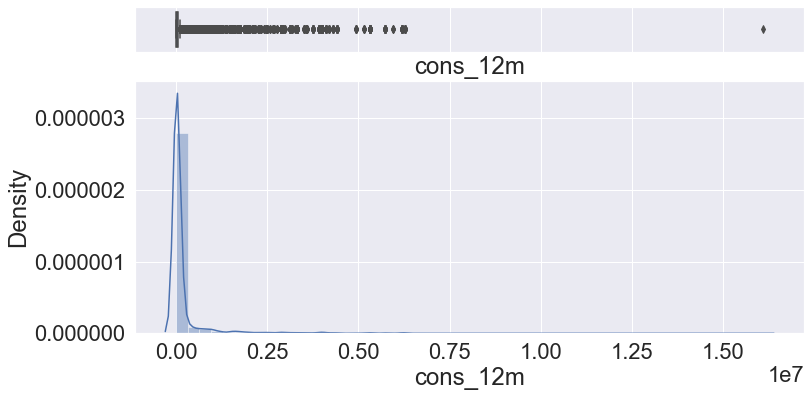

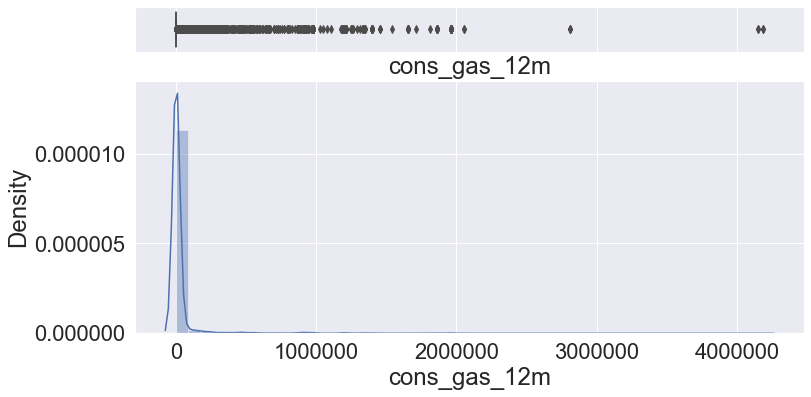

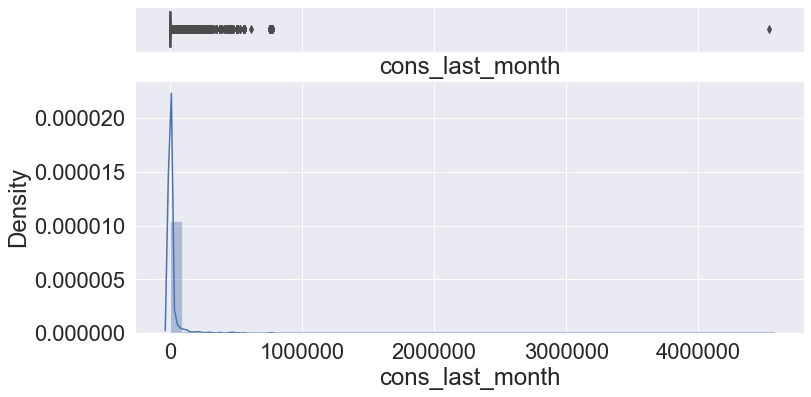

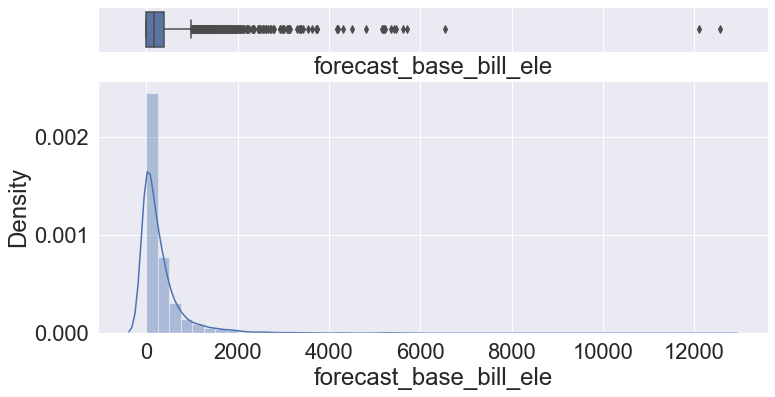

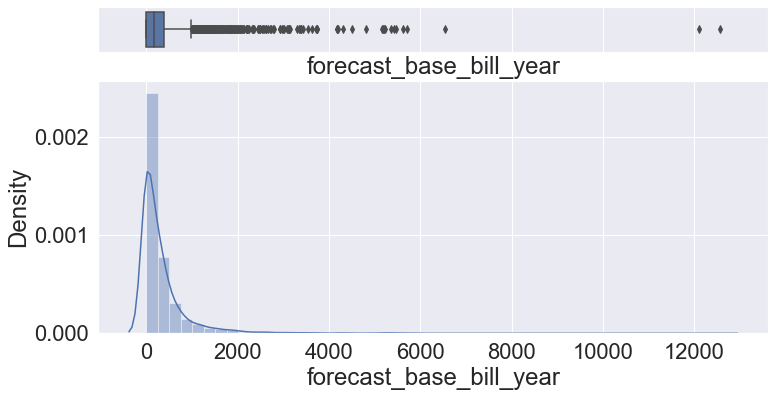

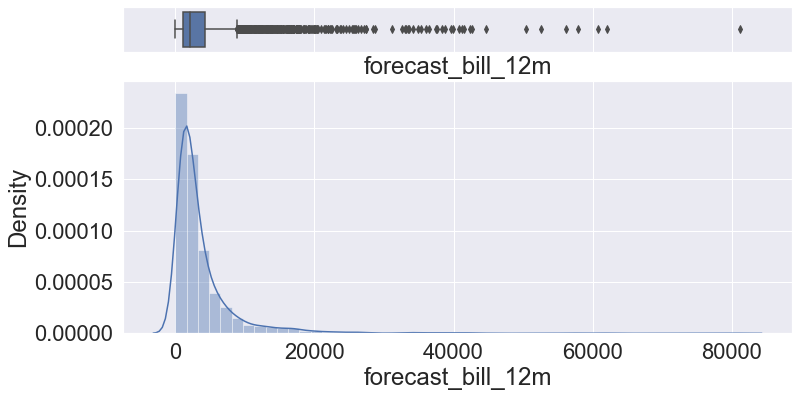

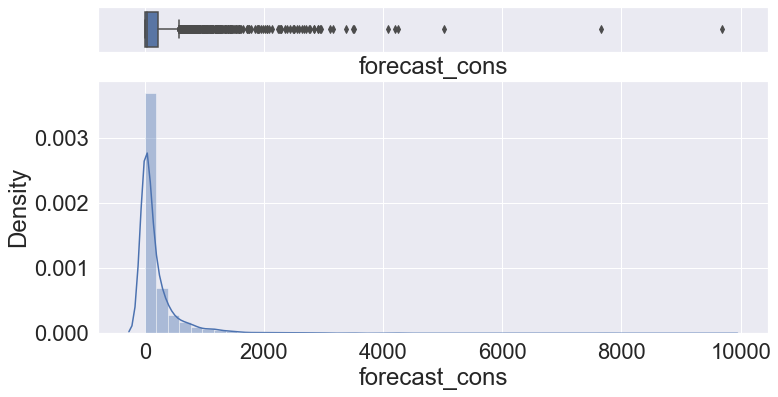

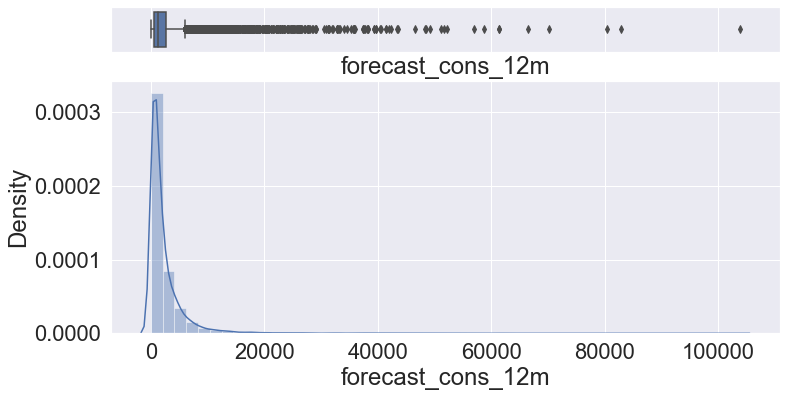

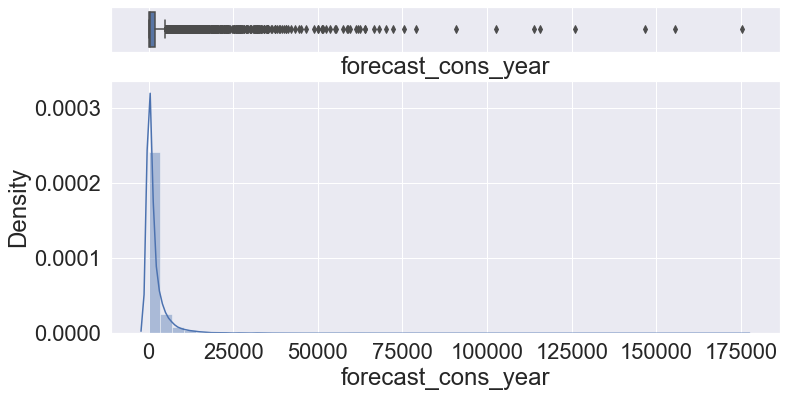

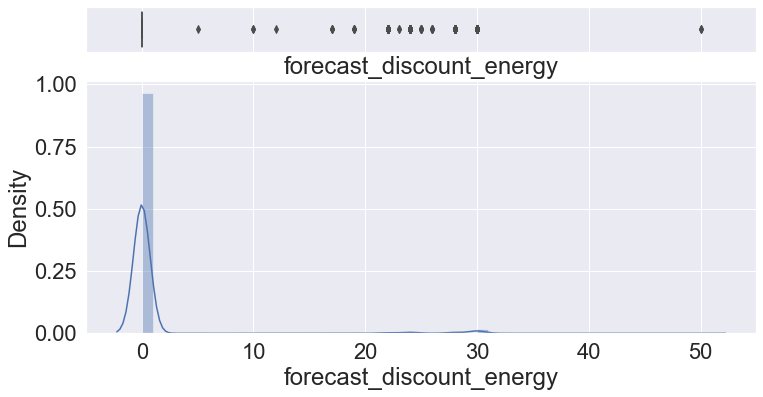

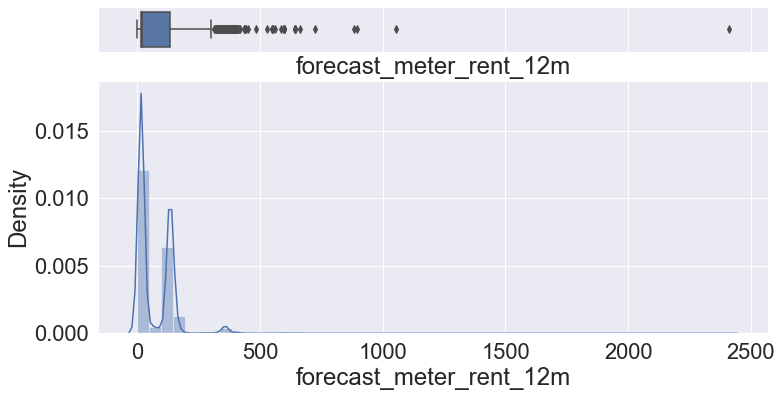

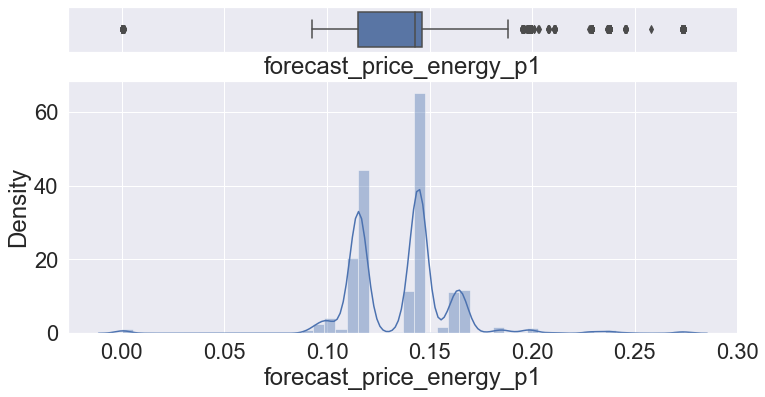

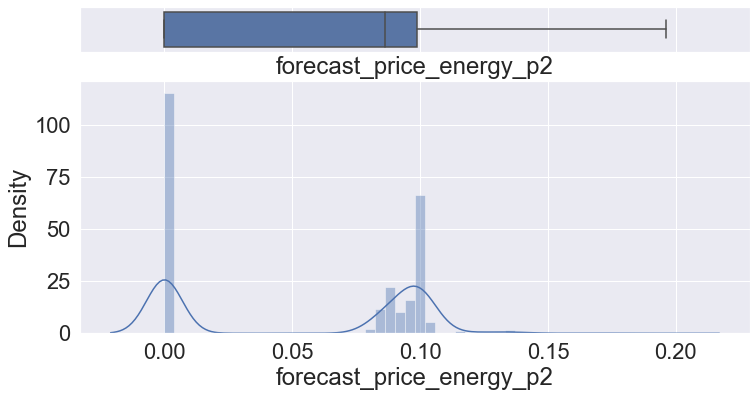

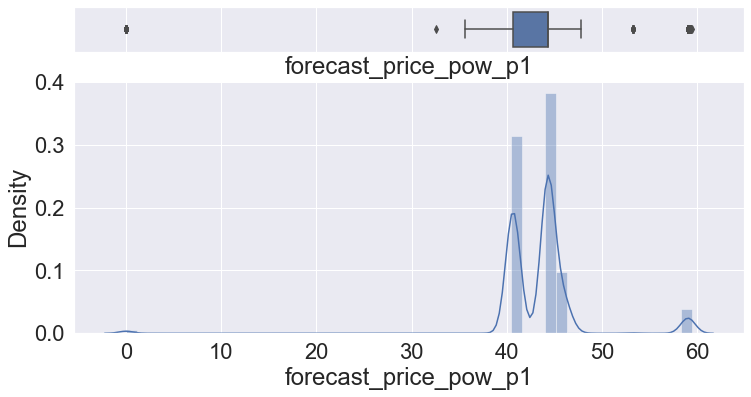

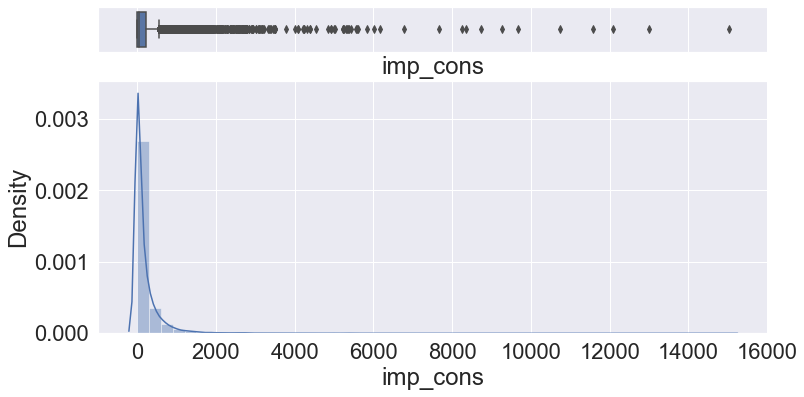

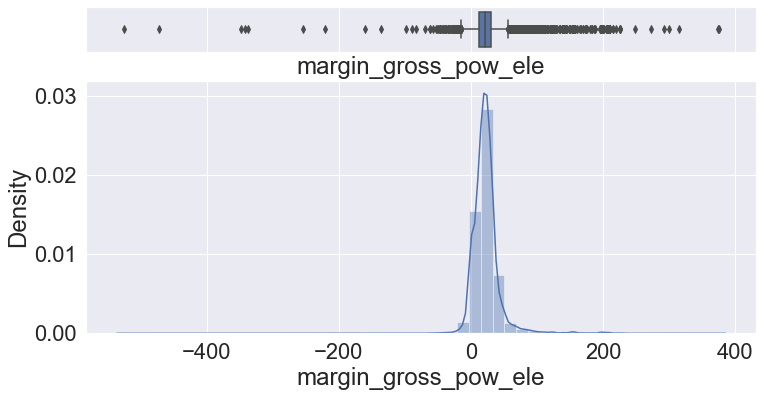

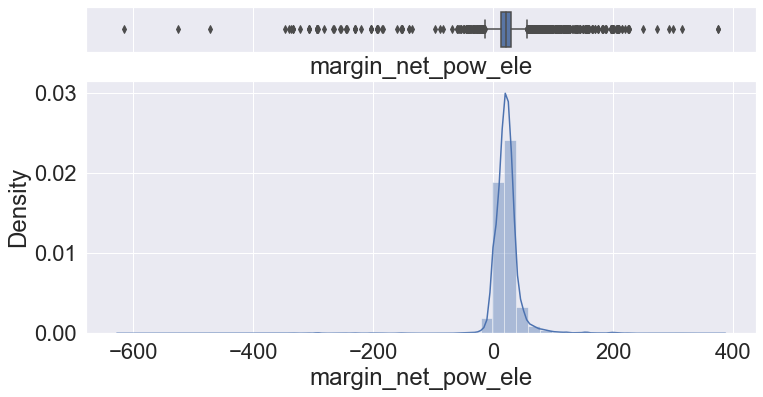

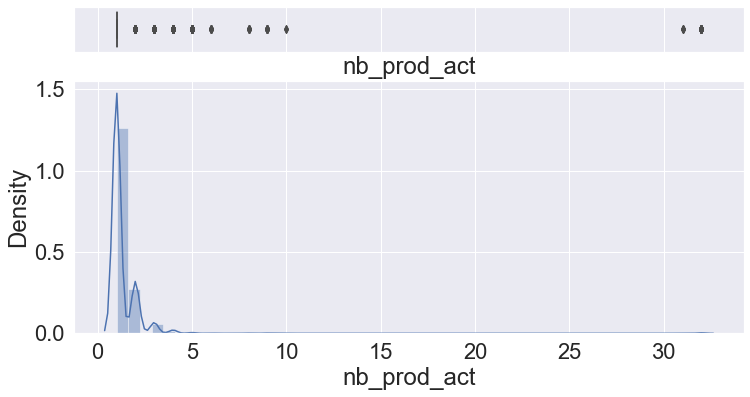

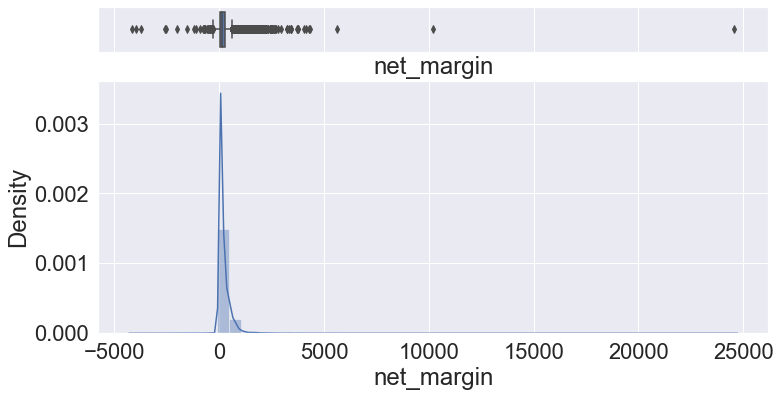

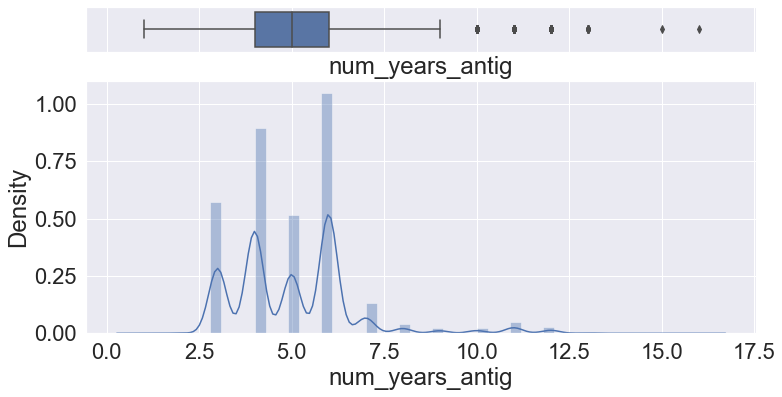

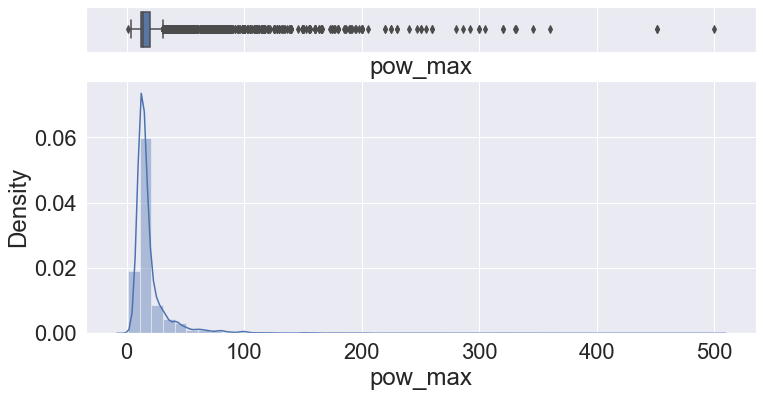

In [24]:
import warnings
warnings.filterwarnings("ignore")

for col in new_train.columns:
    histogram_boxplot(new_train[col], bins=50)
    print('\n')

In [25]:
# Set upper limit as Q3 + 1.5IQR and lower limit as Q1 - 1.5IQR, notice that we need to drop 'cons_gas_12m', 'forecast_discount_energy', 'nb_prod_act' first or it will teem with 0

cols = new_train.columns.to_list()
cols.remove('cons_gas_12m')
cols.remove('forecast_discount_energy')
cols.remove('nb_prod_act')


for col in cols:
    Q1 = new_train[col].quantile(0.25)
    Q3 = new_train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    new_train[col] = new_train[col].clip(lower=Q1-1.5*IQR,
                                         upper=Q3+1.5*IQR)
    
new_train.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
cons_12m,16096.0,35514.824273,40977.732430,0.000000,3.000000,2598.500000,5906.250000,15332.500000,50221.500000,116694.375000,116694.375000,116694.375000,1.166944e+05
cons_gas_12m,16096.0,31912.270378,177588.338403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17393.500000,103137.750000,931501.650000,4.188440e+06
cons_last_month,16096.0,2802.216793,3741.789990,0.000000,0.000000,0.000000,0.000000,901.000000,4127.000000,10317.500000,10317.500000,10317.500000,1.031750e+04
forecast_base_bill_ele,3508.0,259.592558,313.619682,0.000000,0.000000,0.000000,0.000000,162.955000,396.185000,839.876000,990.462500,990.462500,9.904625e+02
forecast_base_bill_year,3508.0,259.592558,313.619682,0.000000,0.000000,0.000000,0.000000,162.955000,396.185000,839.876000,990.462500,990.462500,9.904625e+02
forecast_bill_12m,3508.0,3111.319639,2568.234112,0.000000,0.000000,773.531000,1158.175000,2187.230000,4246.555000,8124.705000,8879.125000,8879.125000,8.879125e+03
forecast_cons,3508.0,143.442832,193.260915,0.000000,0.000000,0.000000,0.000000,42.215000,228.117500,570.293750,570.293750,570.293750,5.702937e+02
forecast_cons_12m,16096.0,1884.575970,1811.577674,0.000000,0.000000,235.645000,513.230000,1179.160000,2692.077500,5396.370000,5960.348750,5960.348750,5.960349e+03
forecast_cons_year,16096.0,1257.108179,1693.899378,0.000000,0.000000,0.000000,0.000000,378.000000,1994.250000,4942.500000,4985.625000,4985.625000,4.985625e+03
forecast_discount_energy,15970.0,0.991547,5.160969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000e+01


In [26]:
# Replace the training set with new processed values
for col in new_train.columns:
    train[col] = new_train[col]
    
train.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
cons_12m,16096.0,35514.824273,40977.732430,0.000000,3.000000,2598.500000,5906.250000,15332.500000,50221.500000,116694.375000,116694.375000,116694.375000,1.166944e+05
cons_gas_12m,16096.0,31912.270378,177588.338403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17393.500000,103137.750000,931501.650000,4.188440e+06
cons_last_month,16096.0,2802.216793,3741.789990,0.000000,0.000000,0.000000,0.000000,901.000000,4127.000000,10317.500000,10317.500000,10317.500000,1.031750e+04
forecast_base_bill_ele,3508.0,259.592558,313.619682,0.000000,0.000000,0.000000,0.000000,162.955000,396.185000,839.876000,990.462500,990.462500,9.904625e+02
forecast_base_bill_year,3508.0,259.592558,313.619682,0.000000,0.000000,0.000000,0.000000,162.955000,396.185000,839.876000,990.462500,990.462500,9.904625e+02
forecast_bill_12m,3508.0,3111.319639,2568.234112,0.000000,0.000000,773.531000,1158.175000,2187.230000,4246.555000,8124.705000,8879.125000,8879.125000,8.879125e+03
forecast_cons,3508.0,143.442832,193.260915,0.000000,0.000000,0.000000,0.000000,42.215000,228.117500,570.293750,570.293750,570.293750,5.702937e+02
forecast_cons_12m,16096.0,1884.575970,1811.577674,0.000000,0.000000,235.645000,513.230000,1179.160000,2692.077500,5396.370000,5960.348750,5960.348750,5.960349e+03
forecast_cons_year,16096.0,1257.108179,1693.899378,0.000000,0.000000,0.000000,0.000000,378.000000,1994.250000,4942.500000,4985.625000,4985.625000,4.985625e+03
forecast_discount_energy,15970.0,0.991547,5.160969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000e+01


#### test set

In [27]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_test = test.select_dtypes(include=numerics)

for col in consumpations:
    new_test[col] = new_test[col].clip(lower=0)

In [28]:
for col in cols:
    test_Q1 = new_test[col].quantile(0.25)
    test_Q3 = new_test[col].quantile(0.75)
    test_IQR = Q3 - Q1
    
    new_test[col] = new_test[col].clip(lower=Q1-1.5*test_IQR,
                                         upper=Q3+1.5*test_IQR)

In [29]:
for col in new_test.columns:
    test[col] = new_test[col]
    
test.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
cons_12m,4024.0,30.391265,3.165160e+00,1.55,1.55,30.750,30.750,30.750,30.750,30.75,30.75,30.75,30.75
cons_gas_12m,4024.0,32155.359841,1.807876e+05,0.00,0.00,0.000,0.000,0.000,0.000,17033.60,84359.85,940292.00,2813019.00
cons_last_month,4024.0,20.928678,1.376614e+01,1.55,1.55,1.550,1.550,30.750,30.750,30.75,30.75,30.75,30.75
forecast_base_bill_ele,877.0,18.730388,1.437836e+01,1.55,1.55,1.550,1.550,30.750,30.750,30.75,30.75,30.75,30.75
forecast_base_bill_year,877.0,18.730388,1.437836e+01,1.55,1.55,1.550,1.550,30.750,30.750,30.75,30.75,30.75,30.75
forecast_bill_12m,877.0,30.417047,3.101991e+00,1.55,1.55,30.750,30.750,30.750,30.750,30.75,30.75,30.75,30.75
forecast_cons,877.0,17.196534,1.437956e+01,1.55,1.55,1.550,1.550,30.750,30.750,30.75,30.75,30.75,30.75
forecast_cons_12m,4024.0,29.833837,4.941285e+00,1.55,1.55,30.750,30.750,30.750,30.750,30.75,30.75,30.75,30.75
forecast_cons_year,4024.0,18.424317,1.438573e+01,1.55,1.55,1.550,1.550,30.750,30.750,30.75,30.75,30.75,30.75
forecast_discount_energy,4000.0,1.071750,5.438566e+00,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,30.00,50.00


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4024 non-null   object 
 1   activity_new              1670 non-null   object 
 2   channel_sales             2968 non-null   object 
 3   cons_12m                  4024 non-null   float64
 4   cons_gas_12m              4024 non-null   int64  
 5   cons_last_month           4024 non-null   float64
 6   date_activ                4024 non-null   object 
 7   date_end                  4024 non-null   object 
 8   date_first_activ          877 non-null    object 
 9   date_modif_prod           3979 non-null   object 
 10  date_renewal              4020 non-null   object 
 11  forecast_base_bill_ele    877 non-null    float64
 12  forecast_base_bill_year   877 non-null    float64
 13  forecast_bill_12m         877 non-null    float64
 14  forecast

### *2.2 Missing Values*

#### *2.2 Cross-Section*

#### training set

In [31]:
# Check the missing proportion of each column
train.isnull().mean()

id                          0.000000
activity_new                0.593004
channel_sales               0.262053
cons_12m                    0.000000
cons_gas_12m                0.000000
cons_last_month             0.000000
date_activ                  0.000000
date_end                    0.000124
date_first_activ            0.782058
date_modif_prod             0.009754
date_renewal                0.002485
forecast_base_bill_ele      0.782058
forecast_base_bill_year     0.782058
forecast_bill_12m           0.782058
forecast_cons               0.782058
forecast_cons_12m           0.000000
forecast_cons_year          0.000000
forecast_discount_energy    0.007828
forecast_meter_rent_12m     0.000000
forecast_price_energy_p1    0.007828
forecast_price_energy_p2    0.007828
forecast_price_pow_p1       0.007828
has_gas                     0.000000
imp_cons                    0.000000
margin_gross_pow_ele        0.000808
margin_net_pow_ele          0.000808
nb_prod_act                 0.000000
n

#### *Notes:*
Since 'channel_sales' and 'origin_up' are categorical variables. We can simply take Null as a special category when we encode them, and we will deal with the datetime variable in Feature Engineering. Therefore, what we need to handle are those numerical variables that contain missing value.

In [32]:
# drop columns with more than 50% missing values
# we exclude 6 cols(activity_new, campaign_disc_ele, date_first_activ, forecast_base_bill_ele, forecast_base_bill_year, forecast_bill_12m, forecast_cons)

train = train.loc[:, train.isnull().mean() < .5]
train.isnull().sum()

id                             0
channel_sales               4218
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       2
date_modif_prod              157
date_renewal                  40
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy     126
forecast_meter_rent_12m        0
forecast_price_energy_p1     126
forecast_price_energy_p2     126
forecast_price_pow_p1        126
has_gas                        0
imp_cons                       0
margin_gross_pow_ele          13
margin_net_pow_ele            13
nb_prod_act                    0
net_margin                    15
num_years_antig                0
origin_up                     87
pow_max                        3
churn                          0
dtype: int64

In [33]:
# only 2 rows' 'date_end' and 3 rows' 'pow_max' are empty, delete them
train = train.loc[train.date_end.isnull() == 0]
train = train.loc[train.pow_max.isnull() == 0]
train.isnull().sum()

id                             0
channel_sales               4216
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       0
date_modif_prod              156
date_renewal                  38
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy     126
forecast_meter_rent_12m        0
forecast_price_energy_p1     126
forecast_price_energy_p2     126
forecast_price_pow_p1        126
has_gas                        0
imp_cons                       0
margin_gross_pow_ele          10
margin_net_pow_ele            10
nb_prod_act                    0
net_margin                    12
num_years_antig                0
origin_up                     87
pow_max                        0
churn                          0
dtype: int64

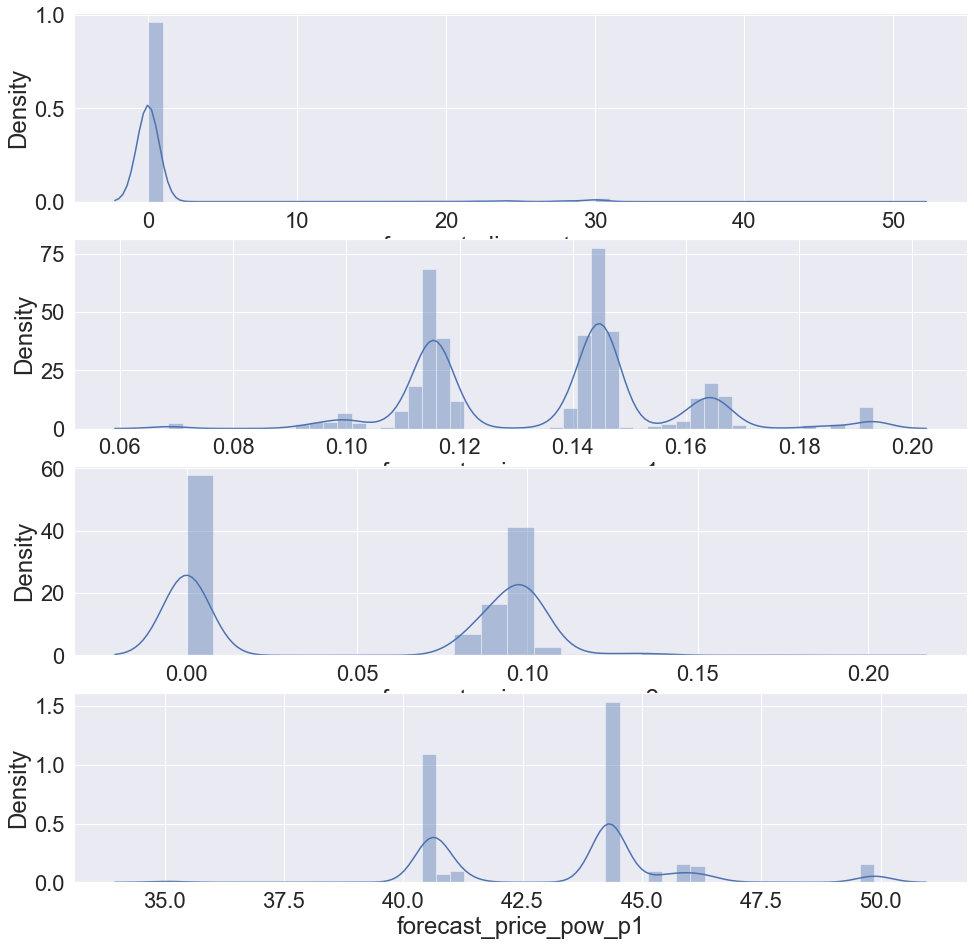

In [34]:
# To see the distibution of cols with missing values(these 4 cols have the same number of missing values)

import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(16, 16))

plt.subplot(411)
sns.distplot(train['forecast_discount_energy'], kde=True)

plt.subplot(412)
sns.distplot(train['forecast_price_energy_p1'], kde=True)

plt.subplot(413)
sns.distplot(train['forecast_price_energy_p2'], kde=True)

plt.subplot(414)
sns.distplot(train['forecast_price_pow_p1'], kde=True)

plt.show()

In [35]:
# We can see that the distributions of those cols are abnormal and complex. Simple filling may not unproper. Therefore we can fill these missing values with weighted values of observations for neighboring data points(by using KNNImputer)
from sklearn.impute import KNNImputer

train_ = train.copy()
train_.drop(columns=['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], inplace=True) # drop 'id' and cols linked to date since they're irrelevant

# one-hot encoding for categorical variables
train_ = pd.get_dummies(train_, columns=['channel_sales', 'origin_up'], dummy_na=True) 
train_ = pd.get_dummies(train_, columns=['has_gas'])
print(train.shape, '\n')
print(train_.shape, '\n')

# Create an instance of KNNImputer
knn_imputer = KNNImputer(n_neighbors=15)
imputed_train = knn_imputer.fit_transform(train_)
imputed_train = pd.DataFrame(imputed_train, columns=train_.columns)

# still have 5 NaN left, fill with mode in the next step
train[['forecast_discount_energy', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1']] = imputed_train[['forecast_discount_energy', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1']]
train.isnull().sum()

(16091, 26) 

(16091, 34) 



id                             0
channel_sales               4216
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       0
date_modif_prod              156
date_renewal                  38
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy       5
forecast_meter_rent_12m        0
forecast_price_energy_p1       5
forecast_price_energy_p2       5
forecast_price_pow_p1          5
has_gas                        0
imp_cons                       0
margin_gross_pow_ele          10
margin_net_pow_ele            10
nb_prod_act                    0
net_margin                    12
num_years_antig                0
origin_up                     87
pow_max                        0
churn                          0
dtype: int64

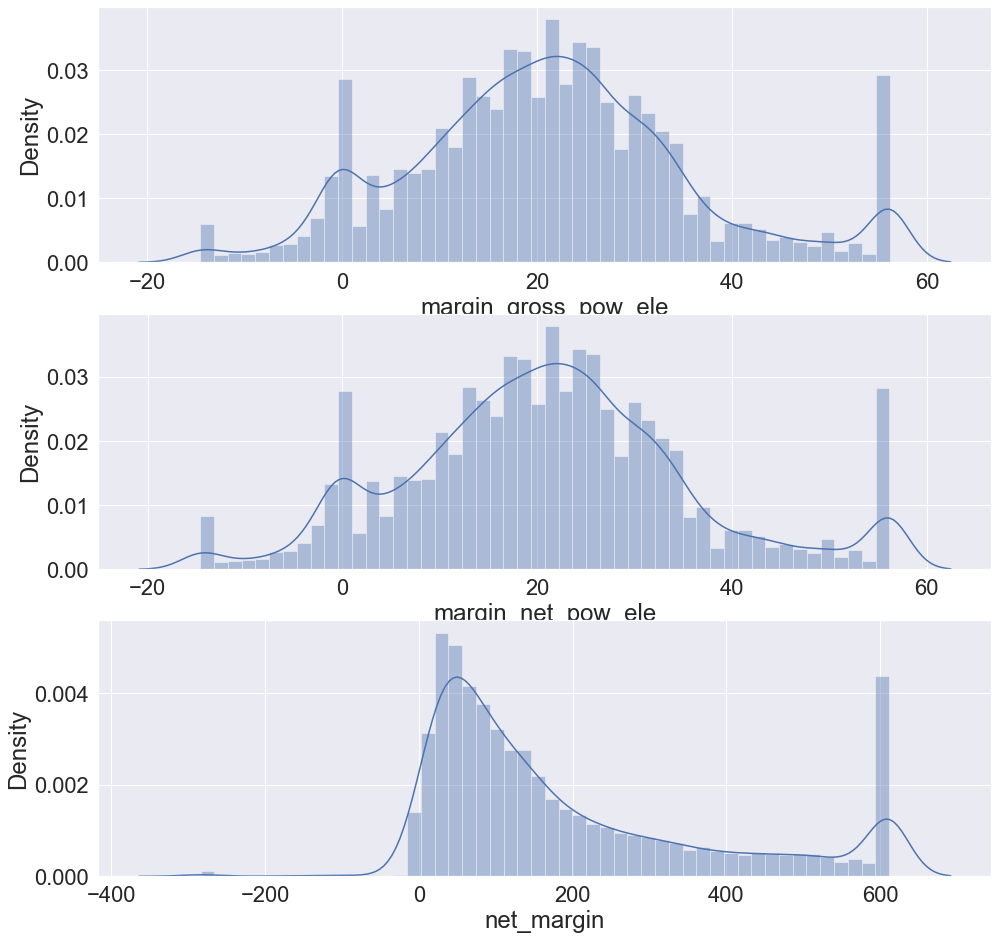

In [36]:
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(16, 16))

plt.subplot(311)
sns.distplot(train['margin_gross_pow_ele'], kde=True)

plt.subplot(312)
sns.distplot(train['margin_net_pow_ele'], kde=True)

plt.subplot(313)
sns.distplot(train['net_margin'], kde=True)

plt.show()

In [37]:
# These cols are not normal distributed either(but much more better), and we still have 5 Null in the previous 4 cols. We are going to fill these missing values with their median, 
lst = ['forecast_discount_energy', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']

for col in lst:
    train[col] = train[col].fillna(train[col].median())
    
train.isnull().sum()

id                             0
channel_sales               4216
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       0
date_modif_prod              156
date_renewal                  38
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy       0
forecast_meter_rent_12m        0
forecast_price_energy_p1       0
forecast_price_energy_p2       0
forecast_price_pow_p1          0
has_gas                        0
imp_cons                       0
margin_gross_pow_ele           0
margin_net_pow_ele             0
nb_prod_act                    0
net_margin                     0
num_years_antig                0
origin_up                     87
pow_max                        0
churn                          0
dtype: int64

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16091 entries, 0 to 16095
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16091 non-null  object 
 1   channel_sales             11875 non-null  object 
 2   cons_12m                  16091 non-null  float64
 3   cons_gas_12m              16091 non-null  int64  
 4   cons_last_month           16091 non-null  float64
 5   date_activ                16091 non-null  object 
 6   date_end                  16091 non-null  object 
 7   date_modif_prod           15935 non-null  object 
 8   date_renewal              16053 non-null  object 
 9   forecast_cons_12m         16091 non-null  float64
 10  forecast_cons_year        16091 non-null  float64
 11  forecast_discount_energy  16091 non-null  float64
 12  forecast_meter_rent_12m   16091 non-null  float64
 13  forecast_price_energy_p1  16091 non-null  float64
 14  foreca

#### test set

In [39]:
test.drop(columns=['activity_new', 'date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons'], axis=1, inplace=True)

In [40]:
test.isnull().sum()

id                             0
channel_sales               1056
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       0
date_modif_prod               45
date_renewal                   4
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy      24
forecast_meter_rent_12m        0
forecast_price_energy_p1      24
forecast_price_energy_p2      24
forecast_price_pow_p1         24
has_gas                        0
imp_cons                       0
margin_gross_pow_ele           2
margin_net_pow_ele             2
nb_prod_act                    0
net_margin                     3
num_years_antig                0
origin_up                     27
pow_max                        1
dtype: int64

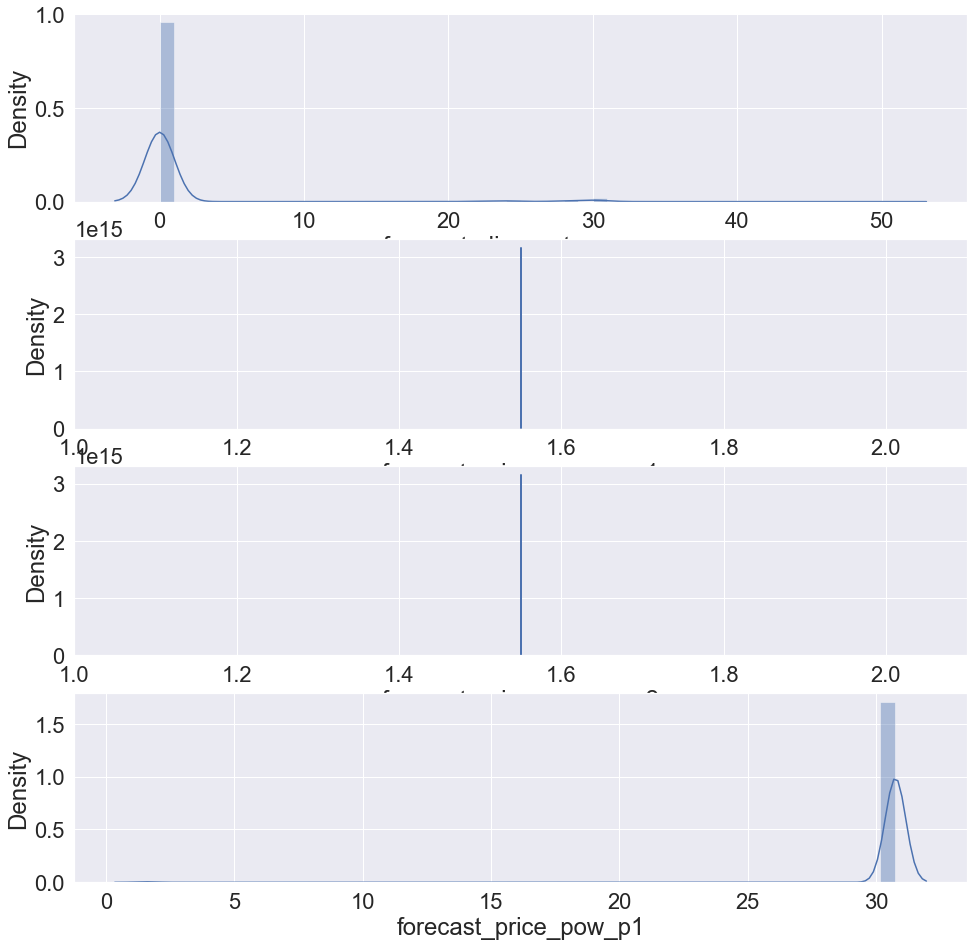

In [41]:
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(16, 16))

plt.subplot(411)
sns.distplot(test['forecast_discount_energy'], kde=True)

plt.subplot(412)
sns.distplot(test['forecast_price_energy_p1'], kde=True)

plt.subplot(413)
sns.distplot(test['forecast_price_energy_p2'], kde=True)

plt.subplot(414)
sns.distplot(test['forecast_price_pow_p1'], kde=True)

plt.show()

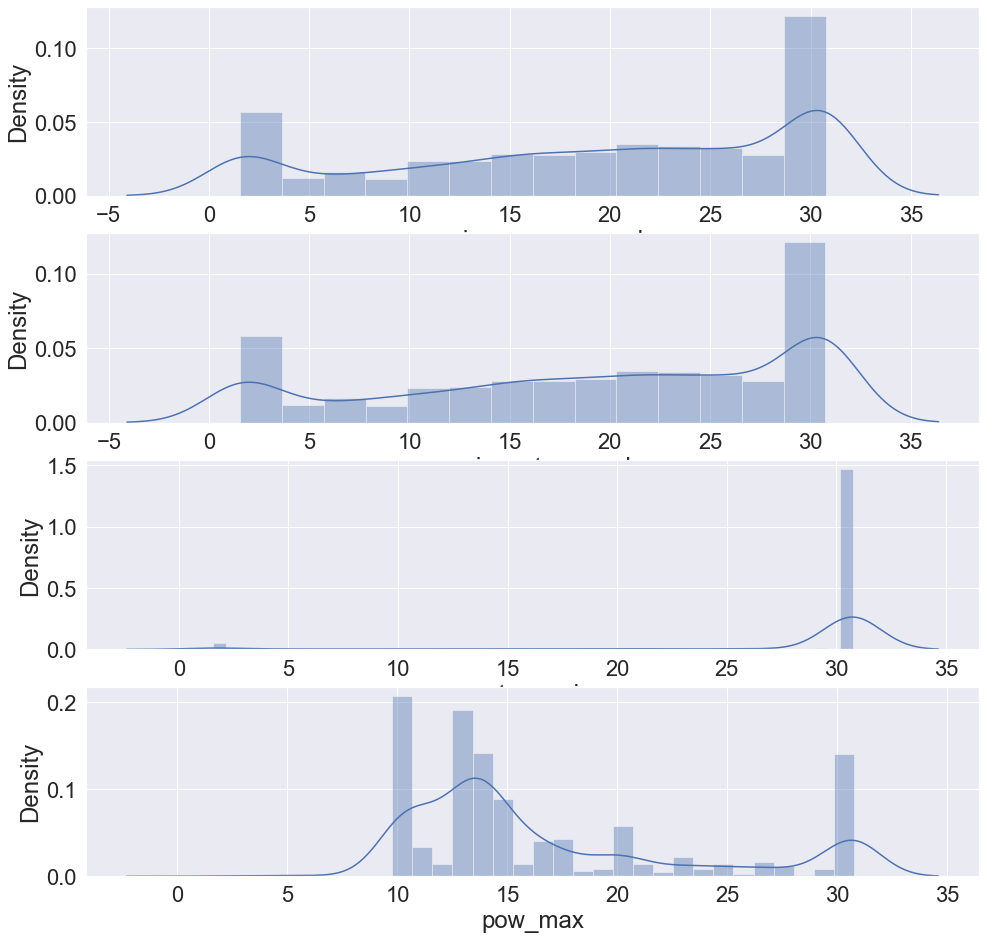

In [42]:
fig = plt.figure(figsize=(16, 16))

plt.subplot(411)
sns.distplot(test['margin_gross_pow_ele'], kde=True)

plt.subplot(412)
sns.distplot(test['margin_net_pow_ele'], kde=True)

plt.subplot(413)
sns.distplot(test['net_margin'], kde=True)

plt.subplot(414)
sns.distplot(test['pow_max'], kde=True)

plt.show()

In [43]:
# Test set data is little different, we can simply fill with their median

test_list = ['forecast_discount_energy', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']

test[test_list].isnull().sum()

forecast_discount_energy    24
forecast_price_energy_p1    24
forecast_price_energy_p2    24
forecast_price_pow_p1       24
margin_gross_pow_ele         2
margin_net_pow_ele           2
net_margin                   3
pow_max                      1
dtype: int64

In [44]:
for col in test_list:
    test[col] = test[col].fillna(test[col].median())
    
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4024 non-null   object 
 1   channel_sales             2968 non-null   object 
 2   cons_12m                  4024 non-null   float64
 3   cons_gas_12m              4024 non-null   int64  
 4   cons_last_month           4024 non-null   float64
 5   date_activ                4024 non-null   object 
 6   date_end                  4024 non-null   object 
 7   date_modif_prod           3979 non-null   object 
 8   date_renewal              4020 non-null   object 
 9   forecast_cons_12m         4024 non-null   float64
 10  forecast_cons_year        4024 non-null   float64
 11  forecast_discount_energy  4024 non-null   float64
 12  forecast_meter_rent_12m   4024 non-null   float64
 13  forecast_price_energy_p1  4024 non-null   float64
 14  forecast

#### *Notes:*
We will deal with remaining NULL values in feature engineering

#### 2.2.1 Panel  data part

#### training set

In [45]:
hist[hist.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015/4/1,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015/6/1,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015/6/1,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015/6/1,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015/6/1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015/6/1,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015/3/1,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015/6/1,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015/7/1,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# groupby cannot ignore Null values automatically, so we have to drop Null values to get correct yearly mean price
hist.dropna(how='any', inplace=True)
hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191643 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            191643 non-null  object 
 1   price_date    191643 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 13.2+ MB


In [47]:
# Group historical data by clients' id and compute yearly mean of each client

grouped_hist = hist.groupby(by='id').mean()
grouped_hist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16094 entries, 0002203ffbb812588b632b9e628cc38d to ffff7fa066f1fb305ae285bb03bf325a
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price_p1_var  16094 non-null  float64
 1   price_p2_var  16094 non-null  float64
 2   price_p3_var  16094 non-null  float64
 3   price_p1_fix  16094 non-null  float64
 4   price_p2_fix  16094 non-null  float64
 5   price_p3_fix  16094 non-null  float64
dtypes: float64(6)
memory usage: 880.1+ KB


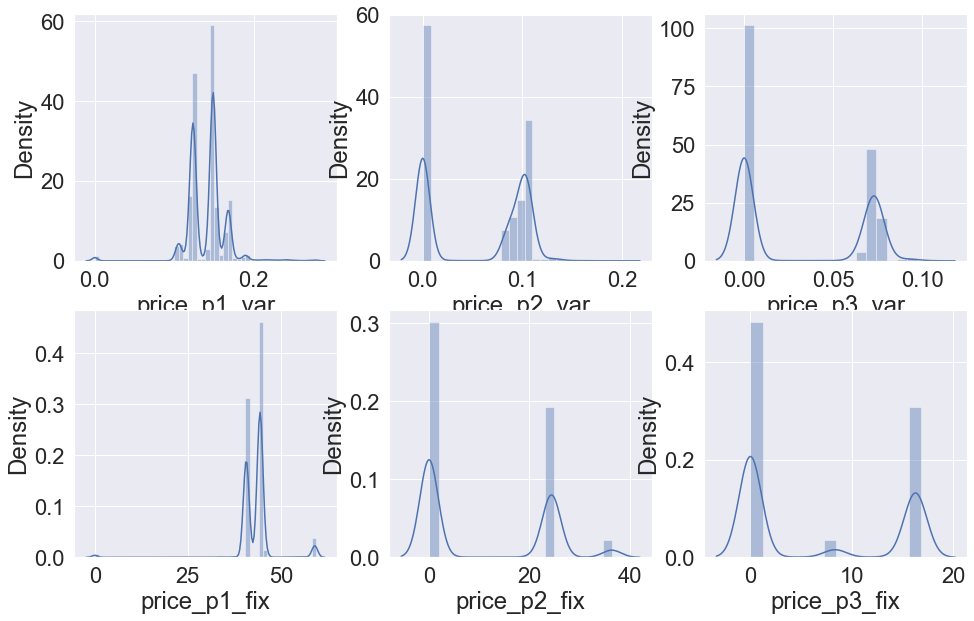

In [48]:
count = 1
plt.subplots(figsize=(16, 10))

for col in grouped_hist.columns:
    plt.subplot(2, 3, count)
    sns.distplot(grouped_hist[col], kde=True)
    count+=1

plt.show()

#### test set

In [49]:
test_hist.dropna(how='any', inplace=True)

grouped_test_hist = test_hist.groupby(by='id').mean()
grouped_test_hist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4024 entries, 000381698491fec6983d55828fe5ada6 to ffeba4728db570a69c39c53323a6a5b4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price_p1_var  4024 non-null   float64
 1   price_p2_var  4024 non-null   float64
 2   price_p3_var  4024 non-null   float64
 3   price_p1_fix  4024 non-null   float64
 4   price_p2_fix  4024 non-null   float64
 5   price_p3_fix  4024 non-null   float64
dtypes: float64(6)
memory usage: 220.1+ KB


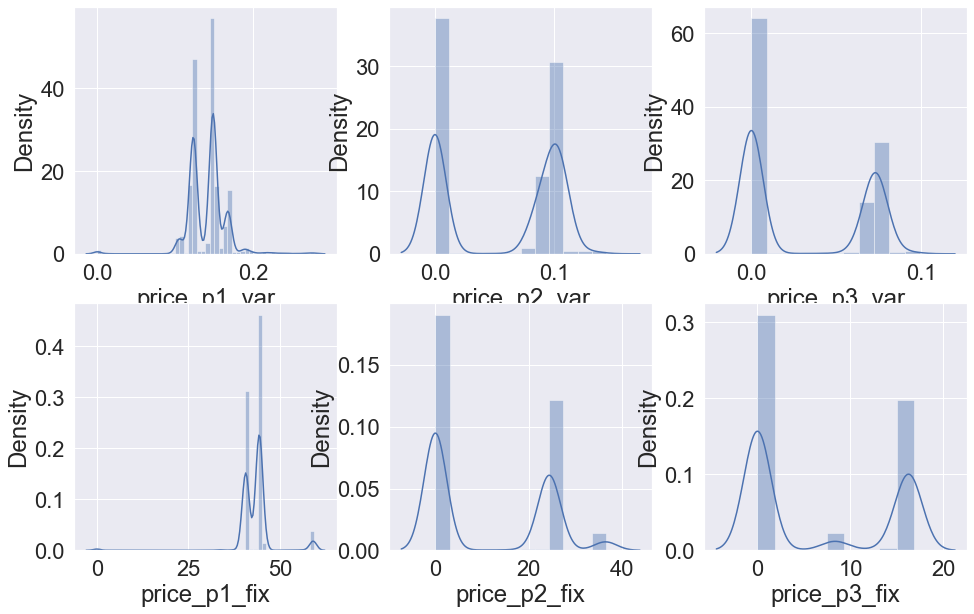

In [50]:
count = 1
plt.subplots(figsize=(16, 10))

for col in grouped_hist.columns:
    plt.subplot(2, 3, count)
    sns.distplot(grouped_test_hist[col], kde=True)
    count+=1

plt.show()

### *2.4 Merge data*

#### training set

In [51]:
train_total = train.merge(grouped_hist, on='id', how='left')
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16091 entries, 0 to 16090
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16091 non-null  object 
 1   channel_sales             11875 non-null  object 
 2   cons_12m                  16091 non-null  float64
 3   cons_gas_12m              16091 non-null  int64  
 4   cons_last_month           16091 non-null  float64
 5   date_activ                16091 non-null  object 
 6   date_end                  16091 non-null  object 
 7   date_modif_prod           15935 non-null  object 
 8   date_renewal              16053 non-null  object 
 9   forecast_cons_12m         16091 non-null  float64
 10  forecast_cons_year        16091 non-null  float64
 11  forecast_discount_energy  16091 non-null  float64
 12  forecast_meter_rent_12m   16091 non-null  float64
 13  forecast_price_energy_p1  16091 non-null  float64
 14  foreca

In [52]:
# in case there are invalid data
train_total = train_total[train_total.price_p1_var.isnull() == 0]
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16089 entries, 0 to 16090
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16089 non-null  object 
 1   channel_sales             11874 non-null  object 
 2   cons_12m                  16089 non-null  float64
 3   cons_gas_12m              16089 non-null  int64  
 4   cons_last_month           16089 non-null  float64
 5   date_activ                16089 non-null  object 
 6   date_end                  16089 non-null  object 
 7   date_modif_prod           15934 non-null  object 
 8   date_renewal              16051 non-null  object 
 9   forecast_cons_12m         16089 non-null  float64
 10  forecast_cons_year        16089 non-null  float64
 11  forecast_discount_energy  16089 non-null  float64
 12  forecast_meter_rent_12m   16089 non-null  float64
 13  forecast_price_energy_p1  16089 non-null  float64
 14  foreca

#### test set

In [53]:
test_total = test.merge(grouped_test_hist, on='id', how='left')
test_total = test_total[test_total.price_p1_var.isnull() == 0]

test_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4023
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4024 non-null   object 
 1   channel_sales             2968 non-null   object 
 2   cons_12m                  4024 non-null   float64
 3   cons_gas_12m              4024 non-null   int64  
 4   cons_last_month           4024 non-null   float64
 5   date_activ                4024 non-null   object 
 6   date_end                  4024 non-null   object 
 7   date_modif_prod           3979 non-null   object 
 8   date_renewal              4020 non-null   object 
 9   forecast_cons_12m         4024 non-null   float64
 10  forecast_cons_year        4024 non-null   float64
 11  forecast_discount_energy  4024 non-null   float64
 12  forecast_meter_rent_12m   4024 non-null   float64
 13  forecast_price_energy_p1  4024 non-null   float64
 14  forecast

## 3. Feature Engineering

### *3.1 Create new features*

In [54]:
# Change data types
import datetime

train_total['date_activ'] = train_total['date_activ'].astype({'date_activ': 'datetime64[ns]'})
train_total['date_end'] = train_total['date_end'].astype({'date_end': 'datetime64[ns]'})
train_total['date_modif_prod'] = train_total['date_modif_prod'].astype({'date_modif_prod': 'datetime64[ns]'})
train_total['date_renewal'] = train_total['date_renewal'].astype({'date_renewal': 'datetime64[ns]'})

test_total['date_activ'] = test_total['date_activ'].astype({'date_activ': 'datetime64[ns]'})
test_total['date_end'] = test_total['date_end'].astype({'date_end': 'datetime64[ns]'})
test_total['date_modif_prod'] = test_total['date_modif_prod'].astype({'date_modif_prod': 'datetime64[ns]'})
test_total['date_renewal'] = test_total['date_renewal'].astype({'date_renewal': 'datetime64[ns]'})

#### Thread:
The longer the cooperation, the less likely that clients will switch to other service providers

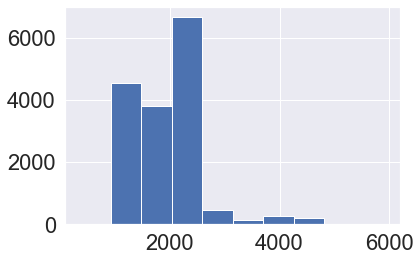

In [55]:
train_total['length_of_contract'] = ((train_total['date_end'] - train_total['date_activ']).dt.days)
train_total['length_of_contract'].fillna(train_total['length_of_contract'].median(), inplace=True)
train_total['length_of_contract'].hist()

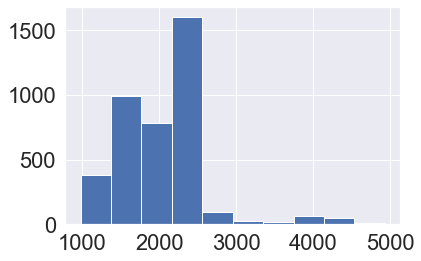

In [56]:
test_total['length_of_contract'] = ((test_total['date_end'] - test_total['date_activ']).dt.days)
test_total['length_of_contract'].fillna(test_total['length_of_contract'].median(), inplace=True)
test_total['length_of_contract'].hist()

#### Thread:
The longer the time clients modify their contract, the more satisfied the customer is with the service,the less likely that clients will switch to other service providers

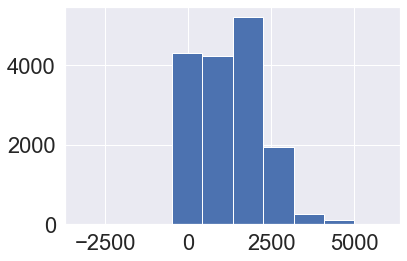

In [57]:
train_total['length_of_satisfaction'] = ((train_total['date_end'] - train_total['date_modif_prod']).dt.days)

train_total['length_of_satisfaction'].fillna(train_total['length_of_satisfaction'].median(), inplace=True)
train_total['length_of_satisfaction'].hist()

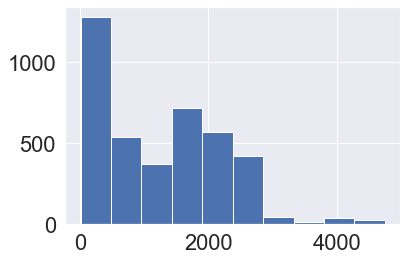

In [58]:
test_total['length_of_satisfaction'] = ((test_total['date_end'] - test_total['date_modif_prod']).dt.days)

test_total['length_of_satisfaction'].fillna(test_total['length_of_satisfaction'].median(), inplace=True)
test_total['length_of_satisfaction'].hist()

In [59]:
# Drop dates columns that are no longer used
train_total.drop(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'num_years_antig'], axis=1, inplace=True)
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16089 entries, 0 to 16090
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16089 non-null  object 
 1   channel_sales             11874 non-null  object 
 2   cons_12m                  16089 non-null  float64
 3   cons_gas_12m              16089 non-null  int64  
 4   cons_last_month           16089 non-null  float64
 5   forecast_cons_12m         16089 non-null  float64
 6   forecast_cons_year        16089 non-null  float64
 7   forecast_discount_energy  16089 non-null  float64
 8   forecast_meter_rent_12m   16089 non-null  float64
 9   forecast_price_energy_p1  16089 non-null  float64
 10  forecast_price_energy_p2  16089 non-null  float64
 11  forecast_price_pow_p1     16089 non-null  float64
 12  has_gas                   16089 non-null  object 
 13  imp_cons                  16089 non-null  float64
 14  margin

In [60]:
test_total.drop(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'num_years_antig'], axis=1, inplace=True)
test_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4023
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4024 non-null   object 
 1   channel_sales             2968 non-null   object 
 2   cons_12m                  4024 non-null   float64
 3   cons_gas_12m              4024 non-null   int64  
 4   cons_last_month           4024 non-null   float64
 5   forecast_cons_12m         4024 non-null   float64
 6   forecast_cons_year        4024 non-null   float64
 7   forecast_discount_energy  4024 non-null   float64
 8   forecast_meter_rent_12m   4024 non-null   float64
 9   forecast_price_energy_p1  4024 non-null   float64
 10  forecast_price_energy_p2  4024 non-null   float64
 11  forecast_price_pow_p1     4024 non-null   float64
 12  has_gas                   4024 non-null   object 
 13  imp_cons                  4024 non-null   float64
 14  margin_g

#### Thread:
The panel data contains tiered pricing for electricity and gas. So if a client's period 2 and period 3 price is not zero, then the company is a big client. A big client may prefer steady cooperation.

In [61]:
train_total.iloc[:10, 21:27]

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051
1,0.122856,0.102137,0.072579,40.640023,24.384011,16.256008
2,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000
3,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
4,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
5,0.118448,0.098134,0.069168,40.674580,24.404747,16.269833
6,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263
7,0.168953,0.087632,0.000000,44.266930,0.000000,0.000000
8,0.166061,0.084744,0.000000,44.266930,0.000000,0.000000
9,0.122816,0.102501,0.073536,40.674580,24.404747,16.269833


In [62]:
train_total['price_p1_var'] = train_total['price_p1_var'].apply(lambda x: 1 if x > 0 else 0)
train_total['price_p2_var'] = train_total['price_p2_var'].apply(lambda x: 1 if x > 0 else 0)
train_total['price_p3_var'] = train_total['price_p3_var'].apply(lambda x: 1 if x > 0 else 0)

train_total['price_p1_fix'] = train_total['price_p1_fix'].apply(lambda x: 1 if x > 0 else 0)
train_total['price_p2_fix'] = train_total['price_p2_fix'].apply(lambda x: 1 if x > 0 else 0)
train_total['price_p3_fix'] = train_total['price_p3_fix'].apply(lambda x: 1 if x > 0 else 0)

train_total['power_importance'] = train_total['price_p1_var'] + train_total['price_p2_var'] + train_total['price_p3_var']

train_total['energy_importance'] = train_total['price_p1_fix'] + train_total['price_p2_fix'] + train_total['price_p3_fix']

train_total.power_importance.value_counts()

1    7226
3    6776
2    2065
0      22
Name: power_importance, dtype: int64

In [63]:
test_total['price_p1_var'] = test_total['price_p1_var'].apply(lambda x: 1 if x > 0 else 0)
test_total['price_p2_var'] = test_total['price_p2_var'].apply(lambda x: 1 if x > 0 else 0)
test_total['price_p3_var'] = test_total['price_p3_var'].apply(lambda x: 1 if x > 0 else 0)

test_total['price_p1_fix'] = test_total['price_p1_fix'].apply(lambda x: 1 if x > 0 else 0)
test_total['price_p2_fix'] = test_total['price_p2_fix'].apply(lambda x: 1 if x > 0 else 0)
test_total['price_p3_fix'] = test_total['price_p3_fix'].apply(lambda x: 1 if x > 0 else 0)

test_total['power_importance'] = test_total['price_p1_var'] + test_total['price_p2_var'] + test_total['price_p3_var']

test_total['energy_importance'] = test_total['price_p1_fix'] + test_total['price_p2_fix'] + test_total['price_p3_fix']

test_total.power_importance.value_counts()

1    1814
3    1698
2     508
0       4
Name: power_importance, dtype: int64

In [64]:
train_total.drop(grouped_hist.columns.to_list(), axis=1, inplace=True)
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16089 entries, 0 to 16090
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16089 non-null  object 
 1   channel_sales             11874 non-null  object 
 2   cons_12m                  16089 non-null  float64
 3   cons_gas_12m              16089 non-null  int64  
 4   cons_last_month           16089 non-null  float64
 5   forecast_cons_12m         16089 non-null  float64
 6   forecast_cons_year        16089 non-null  float64
 7   forecast_discount_energy  16089 non-null  float64
 8   forecast_meter_rent_12m   16089 non-null  float64
 9   forecast_price_energy_p1  16089 non-null  float64
 10  forecast_price_energy_p2  16089 non-null  float64
 11  forecast_price_pow_p1     16089 non-null  float64
 12  has_gas                   16089 non-null  object 
 13  imp_cons                  16089 non-null  float64
 14  margin

In [65]:
test_total.drop(grouped_hist.columns.to_list(), axis=1, inplace=True)
test_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4023
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4024 non-null   object 
 1   channel_sales             2968 non-null   object 
 2   cons_12m                  4024 non-null   float64
 3   cons_gas_12m              4024 non-null   int64  
 4   cons_last_month           4024 non-null   float64
 5   forecast_cons_12m         4024 non-null   float64
 6   forecast_cons_year        4024 non-null   float64
 7   forecast_discount_energy  4024 non-null   float64
 8   forecast_meter_rent_12m   4024 non-null   float64
 9   forecast_price_energy_p1  4024 non-null   float64
 10  forecast_price_energy_p2  4024 non-null   float64
 11  forecast_price_pow_p1     4024 non-null   float64
 12  has_gas                   4024 non-null   object 
 13  imp_cons                  4024 non-null   float64
 14  margin_g

### *3.2 Feature selection*

#### training set

In [66]:
train_total['has_gas'].replace({'f': 0, 't': 1}, inplace=True)
train_total['has_gas'].value_counts()

0    13126
1     2963
Name: has_gas, dtype: int64

In [67]:
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16089 entries, 0 to 16090
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16089 non-null  object 
 1   channel_sales             11874 non-null  object 
 2   cons_12m                  16089 non-null  float64
 3   cons_gas_12m              16089 non-null  int64  
 4   cons_last_month           16089 non-null  float64
 5   forecast_cons_12m         16089 non-null  float64
 6   forecast_cons_year        16089 non-null  float64
 7   forecast_discount_energy  16089 non-null  float64
 8   forecast_meter_rent_12m   16089 non-null  float64
 9   forecast_price_energy_p1  16089 non-null  float64
 10  forecast_price_energy_p2  16089 non-null  float64
 11  forecast_price_pow_p1     16089 non-null  float64
 12  has_gas                   16089 non-null  int64  
 13  imp_cons                  16089 non-null  float64
 14  margin

In [68]:
train_total.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
cons_12m,16089.0,35515.171825,40979.807073,0.000000,3.000000,2600.000000,5908.000000,15332.000000,50220.000000,116694.375000,116694.375000,116694.375000,1.166944e+05
cons_gas_12m,16089.0,31926.154018,177625.721441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17395.000000,103176.600000,932149.360000,4.188440e+06
cons_last_month,16089.0,2802.717416,3742.293718,0.000000,0.000000,0.000000,0.000000,901.000000,4127.000000,10317.500000,10317.500000,10317.500000,1.031750e+04
forecast_cons_12m,16089.0,1884.306184,1811.221982,0.000000,0.000000,235.780000,513.250000,1179.040000,2691.580000,5395.940000,5960.348750,5960.348750,5.960349e+03
forecast_cons_year,16089.0,1257.164973,1694.030508,0.000000,0.000000,0.000000,0.000000,378.000000,1994.000000,4943.200000,4985.625000,4985.625000,4.985625e+03
forecast_discount_energy,16089.0,0.989144,5.141113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000e+01
forecast_meter_rent_12m,16089.0,68.373285,68.967717,0.000000,0.000000,11.108000,16.230000,19.440000,131.470000,144.020000,147.030000,304.330000,3.043300e+02
forecast_price_energy_p1,16089.0,0.135600,0.021844,0.068571,0.092453,0.112922,0.115237,0.142881,0.146348,0.164058,0.166950,0.193015,1.930145e-01
forecast_price_energy_p2,16089.0,0.052969,0.048517,0.000000,0.000000,0.000000,0.000000,0.086163,0.098837,0.100572,0.101734,0.130525,1.959750e-01
forecast_price_pow_p1,16089.0,43.332640,2.514385,35.049686,40.606701,40.606701,40.606701,44.311378,44.311378,45.806878,46.311378,49.868393,4.986839e+01


In [69]:
corr1 = train_total.corr()
corr1

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,length_of_contract,length_of_satisfaction,power_importance,energy_importance
cons_12m,1.000000,0.264714,0.895849,0.618125,0.509533,-0.011537,0.325064,0.003748,-0.004226,-0.001356,...,-0.182306,-0.175608,0.114415,0.572530,0.386587,-0.019137,0.033108,0.122942,0.344362,0.305856
cons_gas_12m,0.264714,1.000000,0.260909,0.112504,0.115577,-0.014275,0.044078,-0.006204,-0.002100,-0.001761,...,-0.035534,-0.034016,0.272003,0.094344,0.062801,-0.040882,-0.010930,0.032537,0.071503,0.050833
cons_last_month,0.895849,0.260909,1.000000,0.552969,0.652080,-0.012205,0.314933,-0.000116,-0.009095,0.001398,...,-0.150958,-0.144758,0.114738,0.512444,0.362067,-0.031327,0.032002,0.123298,0.341550,0.296889
forecast_cons_12m,0.618125,0.112504,0.552969,1.000000,0.725649,-0.009498,0.390623,-0.001929,-0.006891,-0.005054,...,-0.251698,-0.244598,0.041855,0.926039,0.485273,0.003579,0.037969,0.022642,0.372346,0.360936
forecast_cons_year,0.509533,0.115577,0.652080,0.725649,1.000000,-0.008766,0.435968,-0.004080,-0.013358,0.001168,...,-0.185199,-0.178416,0.046403,0.694200,0.480363,-0.007513,0.070012,0.044155,0.439565,0.417142
forecast_discount_energy,-0.011537,-0.014275,-0.012205,-0.009498,-0.008766,1.000000,-0.010386,0.335433,0.048766,0.061947,...,0.005607,0.005328,-0.001128,-0.013877,-0.009122,-0.013590,-0.003673,-0.002954,-0.010188,-0.011091
forecast_meter_rent_12m,0.325064,0.044078,0.314933,0.390623,0.435968,-0.010386,1.000000,-0.018367,0.007577,-0.006691,...,-0.037057,-0.031862,-0.008004,0.438823,0.730116,0.030188,0.102295,0.050087,0.822195,0.869021
forecast_price_energy_p1,0.003748,-0.006204,-0.000116,-0.001929,-0.004080,0.335433,-0.018367,1.000000,-0.450032,0.481734,...,0.005740,0.005971,0.001546,-0.006189,-0.015885,0.001458,-0.002335,0.004069,-0.016884,-0.017789
forecast_price_energy_p2,-0.004226,-0.002100,-0.009095,-0.006891,-0.013358,0.048766,0.007577,-0.450032,1.000000,-0.486710,...,0.007404,0.008166,-0.003017,-0.003569,0.001502,-0.005378,0.000646,0.005076,0.007938,0.005571
forecast_price_pow_p1,-0.001356,-0.001761,0.001398,-0.005054,0.001168,0.061947,-0.006691,0.481734,-0.486710,1.000000,...,0.000130,0.000164,0.006919,-0.006006,-0.009727,0.003719,-0.001653,0.005341,-0.007151,-0.005172


In [70]:
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
       .stack()
       .sort_values(ascending=False)
       .drop_duplicates())

#first element of sol series is the pair with the biggest correlation
sol[sol>0.75]

forecast_cons_year       imp_cons              0.982232
margin_gross_pow_ele     margin_net_pow_ele    0.981893
power_importance         energy_importance     0.938197
forecast_cons_12m        net_margin            0.926039
cons_12m                 cons_last_month       0.895849
forecast_meter_rent_12m  energy_importance     0.869021
                         power_importance      0.822195
pow_max                  energy_importance     0.753501
dtype: float64

In [71]:
margin_set = ['margin_gross_pow_ele', 'margin_net_pow_ele']
cons_set1 = ['forecast_cons_year', 'imp_cons']
cons_set2 = ['cons_last_month', 'cons_12m']
importance_set1 = ['forecast_meter_rent_12m', 'energy_importance']
importance_set2 = ['forecast_meter_rent_12m', 'power_importance']
pow_set = ['pow_max', 'energy_importance']

pca_set = margin_set + cons_set1 + cons_set2 + importance_set1 + importance_set2 + pow_set

In [72]:
# Perform principal component analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
train_total['margin_set'] = pca.fit_transform(train_total[margin_set])
train_total['cons_set1'] = pca.fit_transform(train_total[cons_set1])
train_total['cons_set2'] = pca.fit_transform(train_total[cons_set2])
train_total['importance_set1'] = pca.fit_transform(train_total[importance_set1])
train_total['importance_set2'] = pca.fit_transform(train_total[importance_set2])
train_total['pow_set'] = pca.fit_transform(train_total[pow_set])

In [73]:
train_total.drop(columns=pca_set, axis=1,inplace=True)

train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16089 entries, 0 to 16090
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16089 non-null  object 
 1   channel_sales             11874 non-null  object 
 2   cons_gas_12m              16089 non-null  int64  
 3   forecast_cons_12m         16089 non-null  float64
 4   forecast_discount_energy  16089 non-null  float64
 5   forecast_price_energy_p1  16089 non-null  float64
 6   forecast_price_energy_p2  16089 non-null  float64
 7   forecast_price_pow_p1     16089 non-null  float64
 8   has_gas                   16089 non-null  int64  
 9   nb_prod_act               16089 non-null  int64  
 10  net_margin                16089 non-null  float64
 11  origin_up                 16002 non-null  object 
 12  churn                     16089 non-null  int64  
 13  length_of_contract        16089 non-null  int64  
 14  length

#### test set

In [74]:
test_total['has_gas'].replace({'f': 0, 't': 1}, inplace=True)
test_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4023
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4024 non-null   object 
 1   channel_sales             2968 non-null   object 
 2   cons_12m                  4024 non-null   float64
 3   cons_gas_12m              4024 non-null   int64  
 4   cons_last_month           4024 non-null   float64
 5   forecast_cons_12m         4024 non-null   float64
 6   forecast_cons_year        4024 non-null   float64
 7   forecast_discount_energy  4024 non-null   float64
 8   forecast_meter_rent_12m   4024 non-null   float64
 9   forecast_price_energy_p1  4024 non-null   float64
 10  forecast_price_energy_p2  4024 non-null   float64
 11  forecast_price_pow_p1     4024 non-null   float64
 12  has_gas                   4024 non-null   int64  
 13  imp_cons                  4024 non-null   float64
 14  margin_g

In [75]:
pca = PCA(n_components=1)
test_total['margin_set'] = pca.fit_transform(test_total[margin_set])
test_total['cons_set1'] = pca.fit_transform(test_total[cons_set1])
test_total['cons_set2'] = pca.fit_transform(test_total[cons_set2])
test_total['importance_set1'] = pca.fit_transform(test_total[importance_set1])
test_total['importance_set2'] = pca.fit_transform(test_total[importance_set2])
test_total['pow_set'] = pca.fit_transform(test_total[pow_set])

test_total.drop(columns=pca_set, axis=1,inplace=True)

test_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4023
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4024 non-null   object 
 1   channel_sales             2968 non-null   object 
 2   cons_gas_12m              4024 non-null   int64  
 3   forecast_cons_12m         4024 non-null   float64
 4   forecast_discount_energy  4024 non-null   float64
 5   forecast_price_energy_p1  4024 non-null   float64
 6   forecast_price_energy_p2  4024 non-null   float64
 7   forecast_price_pow_p1     4024 non-null   float64
 8   has_gas                   4024 non-null   int64  
 9   nb_prod_act               4024 non-null   float64
 10  net_margin                4024 non-null   float64
 11  origin_up                 3997 non-null   object 
 12  length_of_contract        4024 non-null   int64  
 13  length_of_satisfaction    4024 non-null   float64
 14  margin_s

## *3.3 Normalization and One-hot encoding*

In [76]:
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16089 entries, 0 to 16090
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16089 non-null  object 
 1   channel_sales             11874 non-null  object 
 2   cons_gas_12m              16089 non-null  int64  
 3   forecast_cons_12m         16089 non-null  float64
 4   forecast_discount_energy  16089 non-null  float64
 5   forecast_price_energy_p1  16089 non-null  float64
 6   forecast_price_energy_p2  16089 non-null  float64
 7   forecast_price_pow_p1     16089 non-null  float64
 8   has_gas                   16089 non-null  int64  
 9   nb_prod_act               16089 non-null  int64  
 10  net_margin                16089 non-null  float64
 11  origin_up                 16002 non-null  object 
 12  churn                     16089 non-null  int64  
 13  length_of_contract        16089 non-null  int64  
 14  length

In [77]:
to_drop = ['channel_sales', 'churn', 'id', 'origin_up', 'has_gas']
X = train_total.drop(columns=to_drop)

y = train_total['churn']

In [78]:
from sklearn import preprocessing   

X_Scale = preprocessing.scale(X)
X_Scale = pd.DataFrame(X_Scale, columns=X.columns)
X_Scale.columns

Index(['cons_gas_12m', 'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'nb_prod_act', 'net_margin',
       'length_of_contract', 'length_of_satisfaction', 'margin_set',
       'cons_set1', 'cons_set2', 'importance_set1', 'importance_set2',
       'pow_set'],
      dtype='object')

In [79]:
test_drop = ['channel_sales', 'id', 'origin_up', 'has_gas']

test_X = test_total.drop(columns=test_drop)

test_Scale = preprocessing.scale(test_X)
test_Scale = pd.DataFrame(test_Scale, columns=test_X.columns)
test_Scale.columns

Index(['cons_gas_12m', 'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'nb_prod_act', 'net_margin',
       'length_of_contract', 'length_of_satisfaction', 'margin_set',
       'cons_set1', 'cons_set2', 'importance_set1', 'importance_set2',
       'pow_set'],
      dtype='object')

In [80]:
X = X_Scale

X['channel_sales'] = train_total['channel_sales']
X['has_gas'] = train_total['has_gas']
X['origin_up'] = train_total['origin_up']


Test = test_Scale

Test['channel_sales'] = test_total['channel_sales']
Test['has_gas'] = test_total['has_gas']
Test['origin_up'] = test_total['origin_up']

# The 'origin_up' col of training set and test set contain different values, therefore we have to combine them before one-hot enconding
Total = pd.concat([X, Test], axis=0)

In [81]:
print(X.shape)
print(Total.shape)

(16089, 19)
(20113, 19)


In [82]:
# 'channel_sales' and 'origin_up' cols contain Null values
Total = pd.get_dummies(Total, columns=['channel_sales', 'origin_up'], dummy_na=True)
Total = pd.get_dummies(Total, columns=['has_gas'])
Total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20113 entries, 0 to 4023
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_gas_12m                                    20113 non-null  float64
 1   forecast_cons_12m                               20113 non-null  float64
 2   forecast_discount_energy                        20113 non-null  float64
 3   forecast_price_energy_p1                        20113 non-null  float64
 4   forecast_price_energy_p2                        20113 non-null  float64
 5   forecast_price_pow_p1                           20113 non-null  float64
 6   nb_prod_act                                     20113 non-null  float64
 7   net_margin                                      20113 non-null  float64
 8   length_of_contract                              20113 non-null  float64
 9   length_of_satisfaction                  

In [83]:
X = Total.iloc[:16089, :]
Test = Total.iloc[16089:, :]

X.shape, Test.shape

((16089, 33), (4024, 33))

### *3.4 Oversampling and Split*

In [84]:
X.shape, y.shape

((16089, 33), (16089,))

In [85]:
# As we can see, the postive samples take approxiamtely 10% of the total. In other words, the data is skewed, therefore, techniques that tackle imblanced samples are needed.
y.value_counts()[1] / y.shape[0]

0.09907390142333271

In [86]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_sample(X, y)

X_sm.shape, y_sm.shape

((28990, 33), (28990,))

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [88]:
X_train.shape, X_test.shape

((20293, 33), (8697, 33))

In [89]:
y_train.shape, y_test.shape

((20293,), (8697,))

## 4. Modelling

### *4.1 Logistic Regression*

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=5000,
                         random_state=42).fit(X_train, y_train)

lr_pred = lr.predict(X_test)

accuracy_score(lr_pred, y_test)

0.7501437277222031

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

lr_cm = confusion_matrix(y_test, lr_pred)
lr_cm

array([[3583,  767],
       [1406, 2941]])

<Figure size 432x288 with 0 Axes>

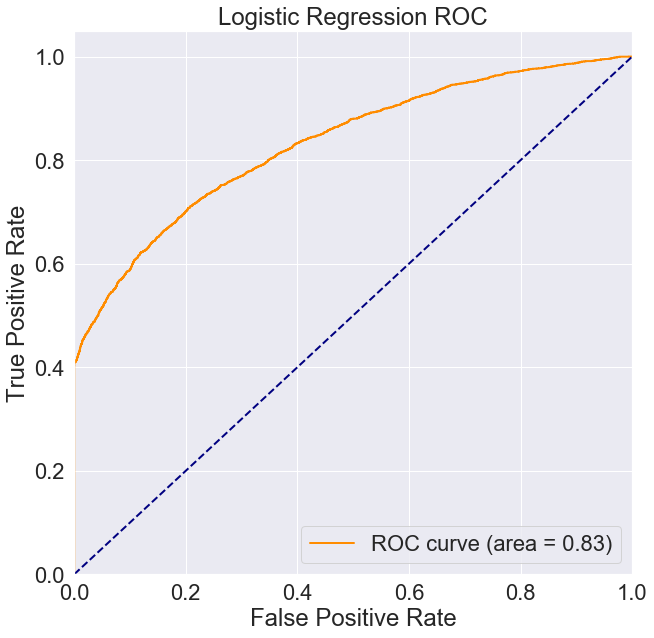

In [92]:
from sklearn import metrics

lr_score = lr.fit(X_train, y_train).decision_function(X_test)
fpr,tpr,threshold = metrics.roc_curve(y_test, lr_score)
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

### *4.2 KNN*

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

accuracy_score(knn_pred, y_test)

0.858456939174428

In [94]:
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm

array([[3205, 1145],
       [  86, 4261]])

<Figure size 432x288 with 0 Axes>

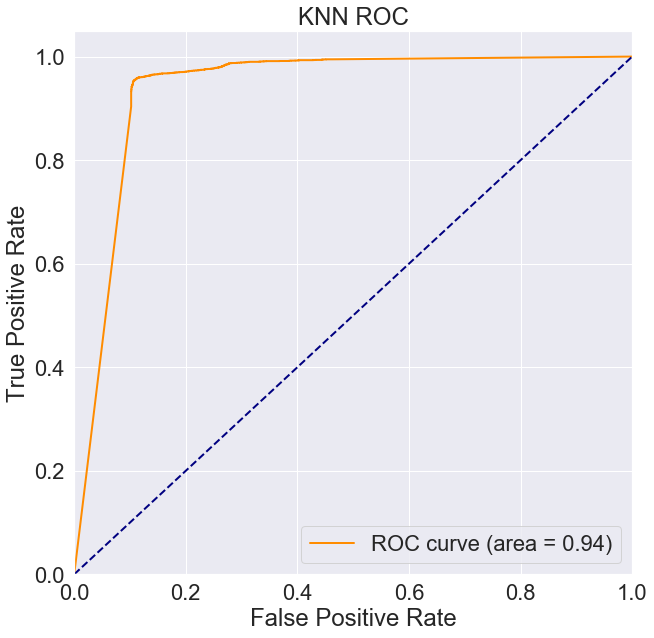

In [95]:
from sklearn import metrics

knn_score = knn.predict_proba(X_test)
fpr,tpr,threshold = metrics.roc_curve(y_test, knn_score[:, 1])
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC')
plt.legend(loc="lower right")
plt.show()

### *4.3 Naive Bayes*

In [96]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_pred = nb.fit(X_train, y_train).predict(X_test)

accuracy_score(nb_pred, y_test)

0.5170748533977233

In [97]:
# Print the confusion matrix
nb_cm = confusion_matrix(y_test, nb_pred)
nb_cm

array([[ 172, 4178],
       [  22, 4325]])

<Figure size 432x288 with 0 Axes>

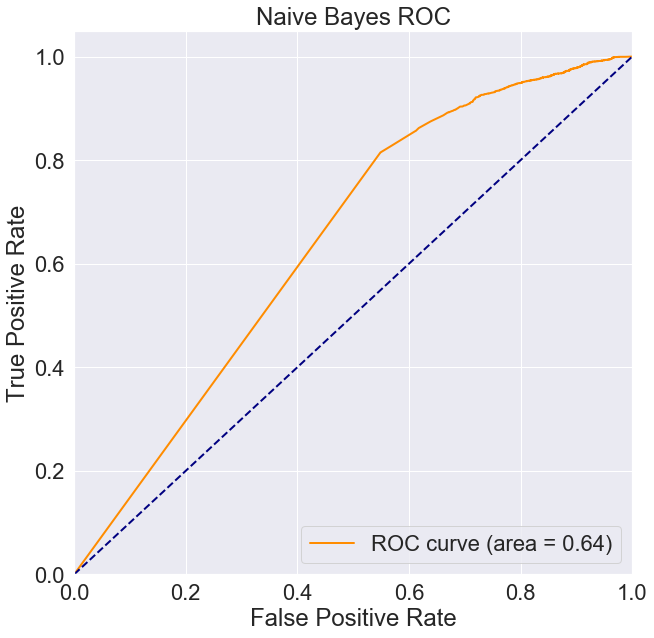

In [98]:
nb_score = nb.predict_proba(X_test)
fpr,tpr,threshold = metrics.roc_curve(y_test, nb_score[:, 1])
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC')
plt.legend(loc="lower right")
plt.show()

### *4.4 SVM*

In [99]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

accuracy_score(svm_pred, y_test)

0.8006209037599172

In [100]:
# Print the confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cm

array([[3525,  825],
       [ 909, 3438]])

<Figure size 432x288 with 0 Axes>

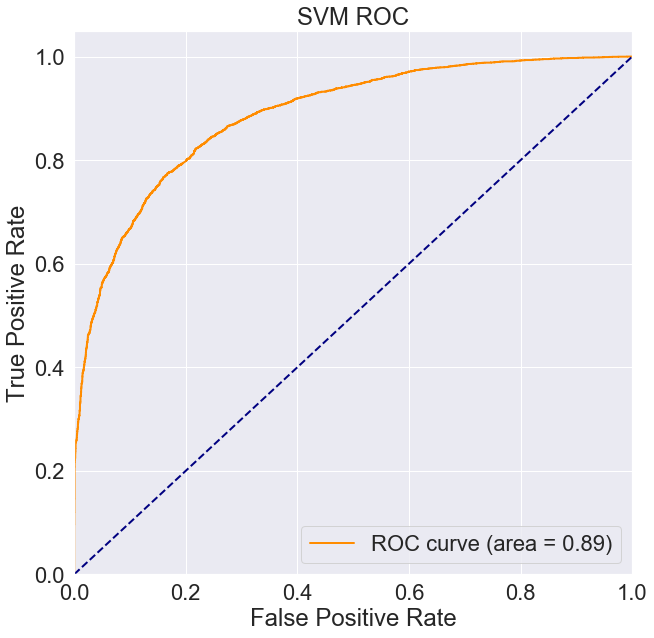

In [101]:
svm_score = svm.predict_proba(X_test)
fpr,tpr,threshold = metrics.roc_curve(y_test, svm_score[:, 1])
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC')
plt.legend(loc="lower right")
plt.show()

### *4.5 Decision Tree and Feature Importance*

In [102]:
# Test Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
tree_pred = tree.predict(X_test)
scores_accuracy = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(tree, X_train, y_train, cv=5, scoring='f1_macro')

In [103]:
# Print the confusion matrix
tree_cm = confusion_matrix(y_test, tree_pred)
print(tree_cm, '\n')

print('cross_val accuracy: ', scores_accuracy)
print('cross_val f1-score: ', scores_f1)

[[3529  821]
 [ 632 3715]] 

cross_val accuracy:  [0.82655827 0.81350086 0.81497906 0.82947265 0.81123706]
cross_val f1-score:  [0.8265468  0.8133876  0.81473275 0.82936903 0.81115995]


<Figure size 432x288 with 0 Axes>

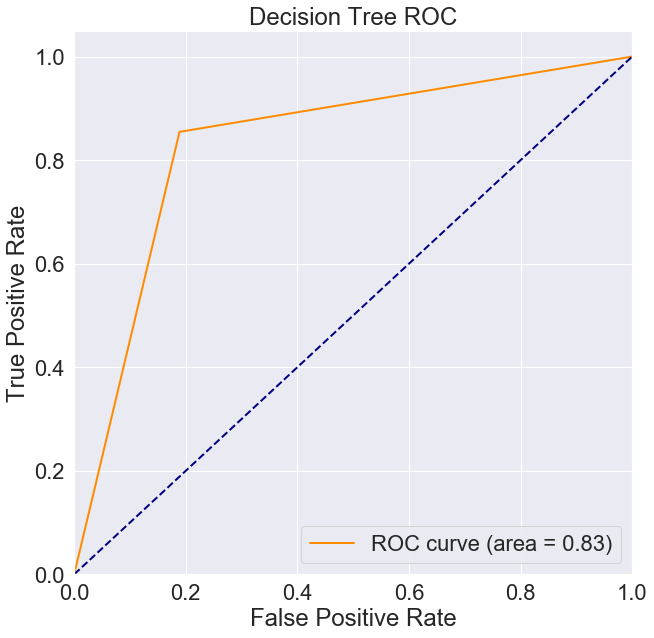

In [104]:
tree_score = tree.predict_proba(X_test)
fpr,tpr,threshold = metrics.roc_curve(y_test, tree_score[:, 1])
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.show()

In [105]:
def plot_importance(model):
    """
    Fuction to plot variable importance from machine learning model.
    Note: the model requires to have "model.feature_importances_".
   
    Inputs
    -------
    - model: a model with a object ".feature_importances_"

    Returns
    -------
    - feature importance plot
   

    """

    feature_importance = model.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(16, 16))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title(f'Variable Importance {model.__class__.__name__}')
    plt.show()

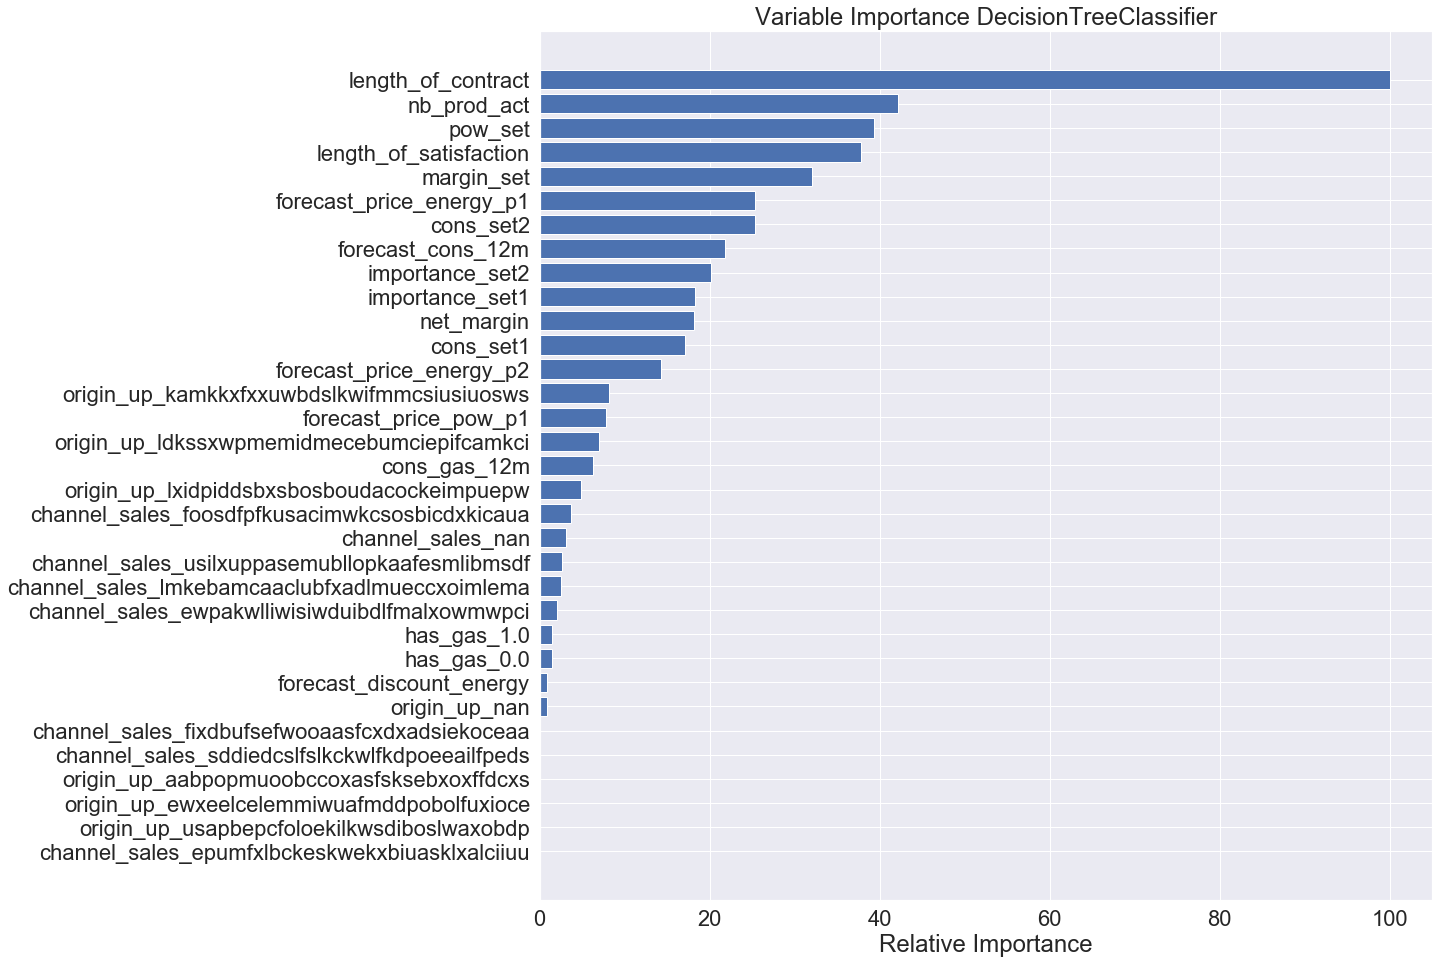

In [106]:
plot_importance(tree)

### *4.6 Comparison*

In [107]:
%%time

# plot ROC curve of each model in a single figure
classifiers = [LogisticRegression(max_iter=5000, random_state=42), 
               GaussianNB(), 
               KNeighborsClassifier(n_neighbors=3, weights='distance'), 
               SVC(probability=True),
               DecisionTreeClassifier(random_state=42),
              ]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for clf in classifiers:
    from sklearn.metrics import roc_curve, roc_auc_score
    
    model = clf.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':clf.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

CPU times: user 4min 17s, sys: 4.73 s, total: 4min 22s
Wall time: 4min 36s


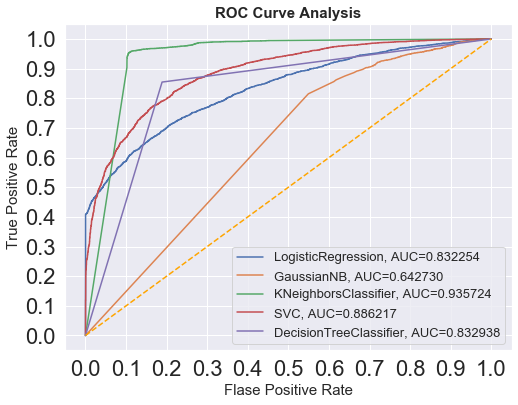

In [108]:
# create a fig
fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.6f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### *Notes:*
Although KNN seems to be able to significantly outperform other 4 models at ROC-AUC metric. Our goal is to find clients that are more likely to quit(positive samples). Therefore, we should pay more attention to 'Recall' when we choose our model. Next, we will get the 'Recall' of each model.

In [109]:
from sklearn.metrics import recall_score, precision_score

clfs_preds = {
    'Logistic Regression': lr_pred,
    'KNN': knn_pred,
    'Naive Bayes': nb_pred,
    'SVM': svm_pred,
    'Decision Tree': tree_pred
             }

recall = []
precision = []

for clf, clf_pred in clfs_preds.items():
    clf_recall = recall_score(y_test, clf_pred, average='macro')
    clf_precision = precision_score(y_test, clf_pred, average='macro')
    recall.append(clf_recall)
    precision.append(clf_precision)
    
#     print(clf)
#     print('Macro-average recall：', recall_score(y_test, clf_pred, average='macro'))
#     print('\n')

In [110]:
Recall = pd.DataFrame(recall, index=clfs_preds.keys(), columns=['Recall'])
Precision = pd.DataFrame(precision, index=clfs_preds.keys(), columns=['Precision'])
Report = pd.concat([Recall, Precision], axis=1)
Report

,Recall,Precision
Logistic Regression,0.750118,0.755665
KNN,0.858499,0.881033
Naive Bayes,0.517240,0.697621
SVM,0.800618,0.800734
Decision Tree,0.832938,0.833558


### *4.7 Final Model*
As we can see, even the recall of KNN is the best among these 5 models. So we finally choose KNN as our model.

In [111]:
%%time
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = range(1, 30)
n_neighbors = range(1, 10)
p = [1, 2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier(n_jobs=-1)

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)

#Fit the model
best_model = clf.fit(X_train, y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

leaf = best_model.best_estimator_.get_params()['leaf_size']
p = best_model.best_estimator_.get_params()['p']
nn = best_model.best_estimator_.get_params()['n_neighbors']

Best leaf_size: 1
Best p: 1
Best n_neighbors: 2
CPU times: user 27min 12s, sys: 50.2 s, total: 28min 2s
Wall time: 2h 11min 22s


In [112]:
knn_final = KNeighborsClassifier(leaf_size=leaf, n_neighbors=nn, weights='distance', p=p)
knn_final.fit(X_train, y_train)
knn_final_pred = knn_final.predict(X_test)

accuracy_score(knn_final_pred, y_test)

0.9090490973899046

In [113]:
knn_final_cm = confusion_matrix(y_test, knn_final_pred)
print(knn_final_cm, '\n')

knn_recall2 = recall_score(y_test, knn_final_pred, average='macro')
knn_precision2 = precision_score(y_test, knn_final_pred, average='macro')

print('precious recall is: ', Report.iloc[1, 0])
print('new recall is : ', knn_recall2, '\n')

print('precious precision is: ', Report.iloc[1, 1])
print('new precision is : ', knn_precision2)

[[3630  720]
 [  71 4276]] 

precious recall is:  0.8584989251406043
new recall is :  0.9090748276655323 

precious precision is:  0.8810332116885556
new precision is :  0.9183503517215286


<Figure size 432x288 with 0 Axes>

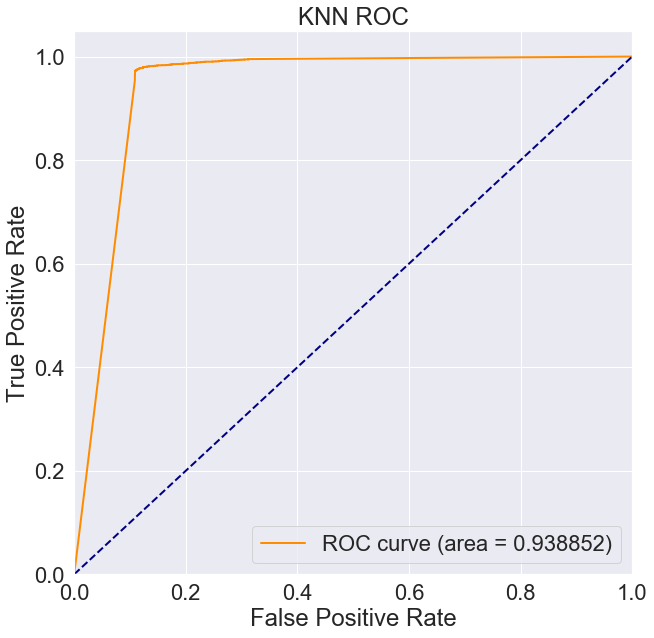

In [114]:
knn_score2 = knn_final.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, knn_score2[:, 1])
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.6f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC')
plt.legend(loc="lower right")
plt.show()

## 5. Output

In [115]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4023
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_gas_12m                                    4024 non-null   float64
 1   forecast_cons_12m                               4024 non-null   float64
 2   forecast_discount_energy                        4024 non-null   float64
 3   forecast_price_energy_p1                        4024 non-null   float64
 4   forecast_price_energy_p2                        4024 non-null   float64
 5   forecast_price_pow_p1                           4024 non-null   float64
 6   nb_prod_act                                     4024 non-null   float64
 7   net_margin                                      4024 non-null   float64
 8   length_of_contract                              4024 non-null   float64
 9   length_of_satisfaction                   

In [116]:
final_pred = knn_final.predict(Test)
final_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [117]:
final_prob = knn_final.predict_proba(Test)
final_prob[:, 1]

array([0.        , 0.        , 0.        , ..., 0.51152818, 0.        ,
       0.        ])

In [118]:
id_list = test.id
id_list.shape

(4024,)

In [119]:
output

,Unnamed: 0,id,Churn_prediction,Churn_probability
0,1,ed18c9981ce183ef347246cdcc55f743,NaN,NaN
1,2,9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN
2,3,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN
3,4,cf81de72ff7997ed10729751059cf7a3,NaN,NaN
4,5,c7c8ee9daf2a864d159d45a2373ada72,NaN,NaN
...,...,...,...,...
4019,4020,93f1821648b90849b459d4d3582c9944,NaN,NaN
4020,4021,09946153320cc5b35bcbfab6938b04ef,NaN,NaN
4021,4022,0c5db283d9a6e40b99d266fd8c9f918d,NaN,NaN
4022,4023,2a4ef4f96452996af6a2478f77d3296e,NaN,NaN


In [120]:
# chech wether the id of test set and output are different, 0 means the values of two dfs' id col are the same
(id_list != output.id).sum()

0

In [121]:
output['Churn_prediction'] = final_pred
output['Churn_probability'] = final_prob[:, 1]
output = output.iloc[:, 1:]

output.head()

,id,Churn_prediction,Churn_probability
0,ed18c9981ce183ef347246cdcc55f743,0,0.0
1,9c341e73685fcff6e3527ebd51da3fe5,0,0.0
2,97dd64b33716aadc4e22c4ab85d1c7a4,0,0.0
3,cf81de72ff7997ed10729751059cf7a3,0,0.0
4,c7c8ee9daf2a864d159d45a2373ada72,1,1.0


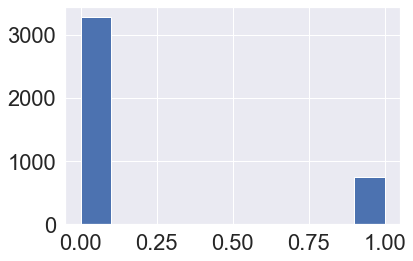

In [122]:
output.Churn_prediction.hist()

In [123]:
output.Churn_prediction.value_counts()

0    3280
1     744
Name: Churn_prediction, dtype: int64

In [124]:
output = output.sort_values(by='Churn_probability', ascending=False)
output.head(10)

,id,Churn_prediction,Churn_probability
2378,01ea7398a25a47b15d589af12307ffc0,1,1.0
3675,ae1025a7f8cff5612ede4f2e41702784,1,1.0
513,66ff5fdcf52039adc5b62d45fb52bd74,1,1.0
2760,f0d4ea43e2b6413e384d4fc9813ea44b,1,1.0
2759,1675b8ecad0aeb4dcfd5d9e8c3b429a9,1,1.0
1155,73edf5e5138af1270ec9bb1ad0fb48d9,1,1.0
517,42b946be7eccc1338218665c029d4a00,1,1.0
1154,1206862742e74dfadf684f0992edd5fe,1,1.0
2757,ccd3a26770dd5e026aeaff777f359559,1,1.0
2549,8426013cb84e275f23c0dfa043169238,1,1.0


In [125]:
output.to_csv('output.csv')